## Download Dataset

In [1]:
%matplotlib inline
import wget
import pandas as pd
from tqdm import tqdm
from collections import defaultdict, deque
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

## Look through data a bit

In [2]:
df = pd.read_csv("./data/all/atp_matches_2022.csv")
df.head(100)

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,...,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
0,2022-8888,Atp Cup,Hard,16,A,20220103,300,200000,NaN,NaN,...,50.0,32.0,7.0,10.0,3.0,5.0,11.0,3308.0,19.0,2260.0
1,2022-8888,Atp Cup,Hard,16,A,20220103,299,133430,NaN,NaN,...,33.0,21.0,8.0,9.0,3.0,6.0,14.0,2475.0,20.0,2230.0
2,2022-8888,Atp Cup,Hard,16,A,20220103,298,105138,NaN,NaN,...,80.0,62.0,20.0,16.0,6.0,7.0,19.0,2260.0,9.0,3706.0
3,2022-8888,Atp Cup,Hard,16,A,20220103,297,105807,NaN,NaN,...,27.0,17.0,1.0,7.0,4.0,8.0,20.0,2230.0,860.0,18.0
4,2022-8888,Atp Cup,Hard,16,A,20220103,296,106421,NaN,NaN,...,35.0,22.0,4.0,8.0,3.0,7.0,2.0,8640.0,11.0,3308.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2022-9665,Melbourne,Hard,32,A,20220103,286,202195,NaN,Q,...,69.0,59.0,24.0,17.0,2.0,2.0,112.0,683.0,26.0,1936.0
96,2022-9665,Melbourne,Hard,32,A,20220103,284,105575,NaN,Q,...,29.0,24.0,10.0,11.0,0.0,4.0,104.0,739.0,66.0,929.0
97,2022-9665,Melbourne,Hard,32,A,20220103,283,200615,NaN,NaN,...,42.0,28.0,18.0,11.0,4.0,7.0,61.0,1000.0,78.0,846.0
98,2022-9665,Melbourne,Hard,32,A,20220103,282,134868,NaN,NaN,...,36.0,25.0,8.0,9.0,3.0,6.0,65.0,966.0,54.0,1101.0


## Clean Up Data

### Concat All Data

In [3]:
all_data = pd.read_csv("./data/all/atp_matches_1991.csv")

In [4]:
all_data

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,...,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
0,1991-339,Adelaide,Hard,32,A,19901231,1,101723,NaN,NaN,...,62.0,44.0,23.0,16.0,6.0,8.0,56.0,NaN,2.0,NaN
1,1991-339,Adelaide,Hard,32,A,19901231,2,100946,NaN,Q,...,41.0,35.0,27.0,15.0,1.0,2.0,304.0,NaN,75.0,NaN
2,1991-339,Adelaide,Hard,32,A,19901231,3,101234,NaN,NaN,...,37.0,22.0,6.0,8.0,4.0,8.0,82.0,NaN,69.0,NaN
3,1991-339,Adelaide,Hard,32,A,19901231,4,101889,8.0,NaN,...,45.0,30.0,11.0,10.0,5.0,8.0,50.0,NaN,84.0,NaN
4,1991-339,Adelaide,Hard,32,A,19901231,5,101274,NaN,NaN,...,41.0,28.0,15.0,11.0,4.0,8.0,88.0,NaN,28.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3722,1991-604,Grand Slam Cup,Carpet,16,A,19911210,11,100656,4.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,20.0,NaN
3723,1991-604,Grand Slam Cup,Carpet,16,A,19911210,12,102021,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,15.0,NaN,36.0,NaN
3724,1991-604,Grand Slam Cup,Carpet,16,A,19911210,13,101609,7.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,17.0,NaN,4.0,NaN
3725,1991-604,Grand Slam Cup,Carpet,16,A,19911210,14,102021,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,15.0,NaN,5.0,NaN


In [5]:
for year in range(1992, 2025):
    file = "./data/all/atp_matches_"+str(year)+".csv"
    
    year_data = pd.read_csv(file)

    all_data = pd.concat([all_data, year_data], axis=0)
all_data

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,...,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
0,1991-339,Adelaide,Hard,32,A,19901231,1,101723,NaN,NaN,...,62.0,44.0,23.0,16.0,6.0,8.0,56.0,NaN,2.0,NaN
1,1991-339,Adelaide,Hard,32,A,19901231,2,100946,NaN,Q,...,41.0,35.0,27.0,15.0,1.0,2.0,304.0,NaN,75.0,NaN
2,1991-339,Adelaide,Hard,32,A,19901231,3,101234,NaN,NaN,...,37.0,22.0,6.0,8.0,4.0,8.0,82.0,NaN,69.0,NaN
3,1991-339,Adelaide,Hard,32,A,19901231,4,101889,8.0,NaN,...,45.0,30.0,11.0,10.0,5.0,8.0,50.0,NaN,84.0,NaN
4,1991-339,Adelaide,Hard,32,A,19901231,5,101274,NaN,NaN,...,41.0,28.0,15.0,11.0,4.0,8.0,88.0,NaN,28.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3071,2024-M-DC-2024-WG2-PO-URU-MDA-01,Davis Cup WG2 PO: URU vs MDA,Clay,4,D,20240203,5,212051,NaN,NaN,...,30.0,17.0,7.0,6.0,8.0,14.0,1109.0,8.0,740.0,34.0
3072,2024-M-DC-2024-WG2-PO-VIE-RSA-01,Davis Cup WG2 PO: VIE vs RSA,Hard,4,D,20240202,1,122533,NaN,NaN,...,41.0,25.0,6.0,9.0,1.0,4.0,554.0,67.0,748.0,32.0
3073,2024-M-DC-2024-WG2-PO-VIE-RSA-01,Davis Cup WG2 PO: VIE vs RSA,Hard,4,D,20240202,2,144748,NaN,NaN,...,51.0,25.0,7.0,11.0,5.0,12.0,416.0,109.0,NaN,NaN
3074,2024-M-DC-2024-WG2-PO-VIE-RSA-01,Davis Cup WG2 PO: VIE vs RSA,Hard,4,D,20240202,4,122533,NaN,NaN,...,51.0,32.0,17.0,14.0,5.0,9.0,554.0,67.0,416.0,109.0


#### Calculate ATP Point Diff and ATP Rank Diff

In [6]:
all_data_filtered = all_data.dropna(subset=[
    'winner_id', 'loser_id', 'winner_ht', 'loser_ht', 'winner_age', 'loser_age',
    "w_ace", "w_df", "w_svpt", "w_1stIn", "w_1stWon", "w_2ndWon", "w_SvGms", "w_bpSaved", "w_bpFaced",
    "l_ace", "l_df", "l_svpt", "l_1stIn", "l_1stWon", "l_2ndWon", "l_SvGms", "l_bpSaved", "l_bpFaced",
    'winner_rank_points', 'loser_rank_points', 'winner_rank', 'loser_rank', "surface"
    ]
)
all_data_filtered = all_data_filtered.reset_index(drop=True)
all_data_filtered

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,...,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
0,1991-301,Auckland,Hard,32,A,19910107,1,101142,1.0,NaN,...,30.0,17.0,7.0,8.0,2.0,6.0,9.0,1487.0,78.0,459.0
1,1991-301,Auckland,Hard,32,A,19910107,2,101613,NaN,Q,...,30.0,22.0,6.0,8.0,7.0,11.0,94.0,371.0,220.0,114.0
2,1991-301,Auckland,Hard,32,A,19910107,3,101179,NaN,NaN,...,43.0,24.0,14.0,11.0,4.0,8.0,77.0,468.0,212.0,116.0
3,1991-301,Auckland,Hard,32,A,19910107,4,101117,NaN,NaN,...,61.0,38.0,15.0,13.0,8.0,12.0,65.0,502.0,72.0,483.0
4,1991-301,Auckland,Hard,32,A,19910107,5,101901,NaN,Q,...,25.0,21.0,12.0,9.0,4.0,6.0,190.0,142.0,28.0,876.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95370,2024-M-DC-2024-WG2-PO-TOG-INA-01,Davis Cup WG2 PO: TOG vs INA,Hard,4,D,20240203,4,207134,NaN,NaN,...,35.0,19.0,5.0,8.0,5.0,9.0,569.0,64.0,819.0,24.0
95371,2024-M-DC-2024-WG2-PO-TUN-CRC-01,Davis Cup WG2 PO: TUN vs CRC,Hard,4,D,20240202,1,121411,NaN,NaN,...,30.0,17.0,9.0,8.0,2.0,5.0,279.0,205.0,900.0,18.0
95372,2024-M-DC-2024-WG2-PO-URU-MDA-01,Davis Cup WG2 PO: URU vs MDA,Clay,4,D,20240203,1,208364,NaN,NaN,...,52.0,24.0,18.0,12.0,8.0,16.0,616.0,55.0,740.0,34.0
95373,2024-M-DC-2024-WG2-PO-URU-MDA-01,Davis Cup WG2 PO: URU vs MDA,Clay,4,D,20240203,4,105430,NaN,NaN,...,66.0,33.0,6.0,8.0,6.0,11.0,136.0,489.0,616.0,55.0


In [7]:
# Concat with Australian Open 2025
file = "./data/all/aus_open_2025.csv"
aus_open_data = pd.read_csv(file)
all_data_filtered = pd.concat([all_data_filtered, aus_open_data], axis=0)

In [8]:
all_data_filtered

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,...,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
0,1991-301,Auckland,Hard,32,A,19910107.0,1.0,101142,1.0,NaN,...,30.0,17.0,7.0,8.0,2.0,6.0,9.0,1487.0,78.0,459.0
1,1991-301,Auckland,Hard,32,A,19910107.0,2.0,101613,NaN,Q,...,30.0,22.0,6.0,8.0,7.0,11.0,94.0,371.0,220.0,114.0
2,1991-301,Auckland,Hard,32,A,19910107.0,3.0,101179,NaN,NaN,...,43.0,24.0,14.0,11.0,4.0,8.0,77.0,468.0,212.0,116.0
3,1991-301,Auckland,Hard,32,A,19910107.0,4.0,101117,NaN,NaN,...,61.0,38.0,15.0,13.0,8.0,12.0,65.0,502.0,72.0,483.0
4,1991-301,Auckland,Hard,32,A,19910107.0,5.0,101901,NaN,Q,...,25.0,21.0,12.0,9.0,4.0,6.0,190.0,142.0,28.0,876.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111,AUSTRALIAN_OPEN_2025,0.0,Hard,128,0.0,0.0,0.0,104925,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,7.0,3900.0,3.0,7010.0
112,AUSTRALIAN_OPEN_2025,0.0,Hard,128,0.0,0.0,0.0,210097,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,20.0,2280.0,55.0,1026.0
113,AUSTRALIAN_OPEN_2025,0.0,Hard,128,0.0,0.0,0.0,206173,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,11830.0,8.0,3535.0
114,AUSTRALIAN_OPEN_2025,0.0,Hard,128,0.0,0.0,0.0,206173,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,11830.0,20.0,2280.0


In [9]:
final_data = pd.DataFrame()
final_data["WINNER_ID"] = all_data_filtered["winner_id"]
final_data["LOSER_ID"] = all_data_filtered["loser_id"]
final_data["ATP_POINT_DIFF"] = all_data_filtered["winner_rank_points"] - all_data_filtered["loser_rank_points"]
final_data["ATP_RANK_DIFF"] = all_data_filtered["winner_rank"] - all_data_filtered["loser_rank"]
final_data["AGE_DIFF"] = all_data_filtered["winner_age"] - all_data_filtered["loser_age"]
final_data["HEIGHT_DIFF"] = all_data_filtered["winner_ht"] - all_data_filtered["loser_ht"]
final_data["BEST_OF"] = all_data_filtered["best_of"]
final_data["DRAW_SIZE"] = all_data_filtered["draw_size"]

In [10]:
# Calculate H2H and H2H on that surface
h2h_surface_dict = defaultdict(lambda: defaultdict(int))
h2h_dict = defaultdict(int)
total_h2h_surface = []
total_h2h = []

for idx, (w_id, l_id, surface) in enumerate(tqdm(zip(all_data_filtered['winner_id'], 
                                                      all_data_filtered['loser_id'], 
                                                      all_data_filtered['surface']),
                                                  total=len(all_data_filtered))):
    wins = h2h_dict[(w_id, l_id)]
    loses = h2h_dict[(l_id, w_id)]

    wins_surface = h2h_surface_dict[surface][(w_id, l_id)]
    loses_surface = h2h_surface_dict[surface][(l_id, w_id)]

    total_h2h.append(wins - loses)
    total_h2h_surface.append(wins_surface - loses_surface)

    h2h_dict[(w_id, l_id)] += 1
    h2h_surface_dict[surface][(w_id, l_id)] += 1
    

final_data["H2H_DIFF"] = total_h2h
final_data["H2H_SURFACE_DIFF"] = total_h2h_surface


100%|██████████| 95491/95491 [00:00<00:00, 571170.24it/s]


In [11]:
# Calculate Number of games played
matches_played = defaultdict(int)
player_w_matches = []
player_l_matches = []
player_diff_matches = []

for idx, (w_id, l_id) in enumerate(tqdm(zip(all_data_filtered['winner_id'], 
                                                      all_data_filtered['loser_id']),
                                                  total=len(all_data_filtered))):
    n_player_w_matches = matches_played[w_id]
    n_player_l_matches = matches_played[l_id]

    player_w_matches.append(n_player_w_matches)
    player_l_matches.append(n_player_l_matches)
    player_diff_matches.append(n_player_w_matches-n_player_l_matches)

    matches_played

    matches_played[w_id] += 1
    matches_played[l_id] += 1

# final_data["W_N_GAMES"] = player_w_matches
# final_data["L_N_GAMES"] = player_l_matches
final_data["DIFF_N_GAMES"] = player_diff_matches


100%|██████████| 95491/95491 [00:00<00:00, 1452379.30it/s]


In [12]:
# Calculate the last WINS in the last N matches

for k in [3, 5, 10, 25, 50, 100]:
    last_k_matches = defaultdict(lambda: deque(maxlen=k))
    wins_last_k = []

    for w_id, l_id in tqdm(zip(all_data_filtered['winner_id'], all_data_filtered['loser_id']), total=len(all_data_filtered)):
        
        if len(last_k_matches[w_id]) != 0 and len(last_k_matches[l_id]) != 0:
            wins_count_w = sum(last_k_matches[w_id])/len(last_k_matches[w_id])
            wins_count_l = sum(last_k_matches[l_id])/len(last_k_matches[l_id])
        else:
            wins_count_w = 0
            wins_count_l = 0
        
        wins_last_k.append(wins_count_w-wins_count_l)

        # Update
        last_k_matches[w_id].append(1)
        last_k_matches[l_id].append(0)

    name = "WIN_LAST_"+str(k)+"_DIFF"
    final_data[name] = wins_last_k


100%|██████████| 95491/95491 [00:00<00:00, 651486.53it/s]


In [13]:
def mean(arr):
    if len(arr) == 0:
        return 0.5
    else:
        total = 0
        for val in arr:
            total += val
        return total/(len(arr))

# Calculate the statistics in the last N matches
for k in [3, 5, 10, 20, 50, 100, 200, 300, 2000]:
    last_k_matches = defaultdict(lambda: defaultdict(lambda: deque(maxlen=k)))
    p_ace_k = []
    p_df_k = []
    p_1stIn_k = []
    p_1stWon_k = []
    p_2ndWon_k = []
    p_bpSaved_k = []

    for row in tqdm(all_data_filtered.itertuples(index=False), total=len(all_data_filtered)):
        w_id, l_id = row.winner_id, row.loser_id
        w_ace, l_ace = row.w_ace, row.l_ace
        w_df, l_df = row.w_df, row.l_df
        w_svpt, l_svpt = row.w_svpt, row.l_svpt
        w_1stIn, l_1stIn = row.w_1stIn, row.l_1stIn
        w_1stWon, l_1stWon = row.w_1stWon, row.l_1stWon
        w_2ndWon, l_2ndWon = row.w_2ndWon, row.l_2ndWon
        w_SvGms, l_SvGms = row.w_SvGms, row.l_SvGms
        w_bpSaved, l_bpSaved = row.w_bpSaved, row.l_bpSaved
        w_bpFaced, l_bpFaced = row.w_bpFaced, row.l_bpFaced

        p_ace_k.append(mean(last_k_matches[w_id]["p_ace"])-mean(last_k_matches[l_id]["p_ace"]))
        p_df_k.append(mean(last_k_matches[w_id]["p_df"])-mean(last_k_matches[l_id]["p_df"]))
        p_1stIn_k.append(mean(last_k_matches[w_id]["p_1stIn"])-mean(last_k_matches[l_id]["p_1stIn"]))
        p_1stWon_k.append(mean(last_k_matches[w_id]["p_1stWon"])-mean(last_k_matches[l_id]["p_1stWon"]))
        p_2ndWon_k.append(mean(last_k_matches[w_id]["p_2ndWon"])-mean(last_k_matches[l_id]["p_2ndWon"]))
        p_bpSaved_k.append(mean(last_k_matches[w_id]["p_bpSaved"])-mean(last_k_matches[l_id]["p_bpSaved"]))


        # Update
        if (w_svpt != 0) and (w_svpt != w_1stIn):
            # Percentatge of aces
            last_k_matches[w_id]["p_ace"].append(100*(w_ace/w_svpt))
            # Percentatge of double faults
            last_k_matches[w_id]["p_df"].append(100*(w_df/w_svpt))
            # Percentatge of first serve in
            last_k_matches[w_id]["p_1stIn"].append(100*(w_1stIn/w_svpt))
            # Percentatge of second serve won
            last_k_matches[w_id]["p_2ndWon"].append(100*(w_2ndWon/(w_svpt-w_1stIn)))
        if l_svpt != 0 and (l_svpt != l_1stIn):
            last_k_matches[l_id]["p_ace"].append(100*(l_ace/l_svpt))
            last_k_matches[l_id]["p_df"].append(100*(l_df/l_svpt))
            last_k_matches[l_id]["p_1stIn"].append(100*(l_1stIn/l_svpt))
            last_k_matches[l_id]["p_2ndWon"].append(100*(l_2ndWon/(l_svpt-l_1stIn)))

        # Percentatge of first serve won
        if w_1stIn != 0:
            last_k_matches[w_id]["p_1stWon"].append(100*(w_1stWon/w_1stIn))
        if l_1stIn != 0:
            last_k_matches[l_id]["p_1stWon"].append(100*(l_1stWon/l_1stIn))
        
        # Percentatge of second serve won
        if w_bpFaced != 0:
            last_k_matches[w_id]["p_bpSaved"].append(100*(w_bpSaved/w_bpFaced))
        if l_bpFaced != 0:
            last_k_matches[l_id]["p_bpSaved"].append(100*(l_bpSaved/l_bpFaced))
        
    final_data["P_ACE_LAST_"+str(k)+"_DIFF"] = p_ace_k
    final_data["P_DF_LAST_"+str(k)+"_DIFF"] = p_df_k
    final_data["P_1ST_IN_LAST_"+str(k)+"_DIFF"] = p_1stIn_k
    final_data["P_1ST_WON_LAST_"+str(k)+"_DIFF"] = p_1stWon_k
    final_data["P_2ND_WON_LAST_"+str(k)+"_DIFF"] = p_2ndWon_k
    final_data["P_BP_SAVED_LAST_"+str(k)+"_DIFF"] = p_bpSaved_k


100%|██████████| 95491/95491 [00:05<00:00, 17740.93it/s]


### Implementing Tennis ELO

In [14]:
# Calculate ELO Tennis
elo_players = defaultdict(int)
all_elo = defaultdict(lambda: deque())
df_elo = []

for w_id, l_id in tqdm(zip(all_data_filtered['winner_id'], all_data_filtered['loser_id']), total=len(all_data_filtered)):
    k = 24

    elo_w = elo_players.get(w_id, 1500)
    elo_l = elo_players.get(l_id, 1500)

    exp_w = 1/(1+10**((elo_l-elo_w)/400))
    exp_l = 1/(1+10**((elo_w-elo_l)/400))

    elo_w += k*(1-exp_w)
    elo_l += k*(0-exp_l)

    df_elo.append(elo_w-elo_l)

    # Update
    elo_players[w_id] = elo_w
    elo_players[l_id] = elo_l

    all_elo[w_id].append(elo_w)
    all_elo[l_id].append(elo_l)

final_data["ELO_DIFF"] = df_elo

100%|██████████| 95491/95491 [00:00<00:00, 861366.69it/s]


In [15]:
# Calculate ELO Tennis per surface
elo_surfaces = defaultdict(lambda: defaultdict(int))
all_elo_surfaces = defaultdict(lambda: defaultdict(lambda: deque()))
df_elo = []

for w_id, l_id, surface in tqdm(zip(all_data_filtered['winner_id'], all_data_filtered['loser_id'], all_data_filtered['surface']), total=len(all_data_filtered)):
    k = 24
    
    elo_w = elo_surfaces[surface].get(w_id, 1500)
    elo_l = elo_surfaces[surface].get(l_id, 1500)

    exp_w = 1/(1+10**((elo_l-elo_w)/400))
    exp_l = 1/(1+10**((elo_w-elo_l)/400))

    elo_w += k*(1-exp_w)
    elo_l += k*(0-exp_l)

    df_elo.append(elo_w-elo_l)

    # Update
    elo_surfaces[surface][w_id] = elo_w
    elo_surfaces[surface][l_id] = elo_l

    all_elo_surfaces[surface][w_id].append(elo_w)
    all_elo_surfaces[surface][l_id].append(elo_l)

    for s in ["Clay", "Grass", "Hard", "Carpet"]:
        if surface != s:
            all_elo_surfaces[s][w_id].append(elo_surfaces[s].get(w_id, 1500))
            all_elo_surfaces[s][l_id].append(elo_surfaces[s].get(l_id, 1500))

final_data["ELO_SURFACE_DIFF"] = df_elo

100%|██████████| 95491/95491 [00:00<00:00, 365949.92it/s]


In [16]:
# Calculate the gradient difference on total ELO
for n in [5, 10, 20, 35, 50, 100, 250]:
    elo_calc = defaultdict(lambda: deque(maxlen=n))
    grad_df_elo = []

    for w_id, l_id in tqdm(zip(all_data_filtered['winner_id'], all_data_filtered['loser_id']), total=len(all_data_filtered)):
        k = 24

        elo_w_list = elo_calc.get(w_id, deque([1500]))
        elo_l_list = elo_calc.get(l_id, deque([1500]))

        elo_w = elo_w_list[-1]
        elo_l = elo_l_list[-1]

        exp_w = 1/(1+10**((elo_l-elo_w)/400))
        exp_l = 1/(1+10**((elo_w-elo_l)/400))

        elo_w += k*(1-exp_w)
        elo_l += k*(0-exp_l)

        # Calculate gradient
        # df_elo.append(elo_w-elo_l)
        if len(elo_w_list) >= n and len(elo_l_list) >= n:
            slope_w = np.polyfit(np.arange(len(elo_w_list)), np.array(elo_w_list), 1)[0]
            slope_l = np.polyfit(np.arange(len(elo_l_list)), np.array(elo_l_list), 1)[0]
            grad_df_elo.append(slope_w-slope_l)
        else:
            grad_df_elo.append(0)

        # Update
        elo_calc[w_id].append(elo_w)
        elo_calc[l_id].append(elo_l)

    final_data["ELO_GRAD_"+str(n)+"_DIFF"] = grad_df_elo


100%|██████████| 95491/95491 [00:01<00:00, 92317.84it/s] 


In [17]:
final_data[80000:]

,WINNER_ID,LOSER_ID,ATP_POINT_DIFF,ATP_RANK_DIFF,AGE_DIFF,HEIGHT_DIFF,BEST_OF,DRAW_SIZE,H2H_DIFF,H2H_SURFACE_DIFF,...,P_BP_SAVED_LAST_2000_DIFF,ELO_DIFF,ELO_SURFACE_DIFF,ELO_GRAD_5_DIFF,ELO_GRAD_10_DIFF,ELO_GRAD_20_DIFF,ELO_GRAD_35_DIFF,ELO_GRAD_50_DIFF,ELO_GRAD_100_DIFF,ELO_GRAD_250_DIFF
80000,106432,105051,841.0,-32.0,-9.000000,0.0,3,64,0,0,...,6.444261,196.379676,196.931634,-6.683133,-6.000999,-3.123984,-2.824546,-1.229468,1.160180,0.000000
80001,103819,105453,4170.0,-10.0,8.400000,7.0,3,64,3,3,...,6.999375,230.922669,266.413618,-2.879421,-2.598731,-3.926027,-2.081096,-1.260959,1.479487,0.705876
80002,104925,100644,1690.0,-2.0,9.900000,-10.0,3,64,-1,0,...,3.747799,214.221116,317.155199,3.054860,7.272872,6.182346,3.970402,0.090597,-2.478836,-2.939864
80003,106432,103819,-5085.0,17.0,-15.300000,3.0,3,64,-1,-2,...,-6.931676,-270.614246,-344.586151,12.087150,3.497060,2.608551,3.444139,3.705298,1.655372,0.000000
80004,104925,106432,4630.0,-16.0,9.500000,0.0,3,64,2,0,...,4.062351,293.841865,378.835340,-9.025187,0.885753,3.106526,1.439039,-1.259594,-4.193783,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111,104925,207989,-3110.0,4.0,15.953457,5.0,5,128,1,2,...,1.415974,93.297142,175.699868,-0.685904,1.530670,3.116970,1.627271,-1.600634,-0.640399,-1.578129
112,210097,132283,1254.0,-35.0,-7.413415,2.0,5,128,0,1,...,5.712232,148.049490,154.666406,-6.688210,-2.921914,3.477755,2.555178,1.863525,2.386409,0.000000
113,206173,200282,8295.0,-7.0,-2.493498,8.0,5,128,9,8,...,7.589218,303.764362,327.732540,-3.868456,5.110113,4.547991,3.631950,1.387032,0.508457,0.613204
114,206173,210097,9550.0,-19.0,1.147844,-2.0,5,128,3,2,...,-1.029495,390.654026,391.699508,-7.701382,0.587323,0.523377,-0.573950,-0.148565,-0.492939,0.000000


### Plot ELO rating progress

Let's plot the ELO rating progression of Novak Djokovic

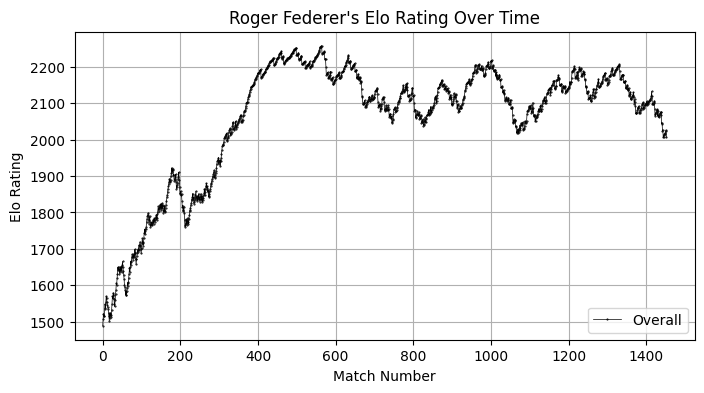

In [18]:
player = list(all_elo[103819])
player_grass = list(all_elo_surfaces["Grass"][103819])
player_clay = list(all_elo_surfaces["Clay"][103819])
player_hard = list(all_elo_surfaces["Hard"][103819])

# Create a simple line plot
fig = plt.figure(figsize=(8, 4))

plt.plot(player, marker='.', linewidth=0.5, markersize=1, linestyle='-', color='black', label="Overall")


plt.title("Roger Federer's Elo Rating Over Time")
plt.xlabel("Match Number")
plt.ylabel("Elo Rating")

plt.legend(loc="lower right")

plt.grid(True)
plt.savefig("./images/ROGER_FEDREDR_elo_rating.png", dpi=500)

plt.draw()
plt.show()


In [19]:
def plot_player_elo_graph(player_id, player_name):
    plt.close('all')

    player = list(all_elo[player_id])
    player_grass = list(all_elo_surfaces["Grass"][player_id])
    player_clay = list(all_elo_surfaces["Clay"][player_id])
    player_hard = list(all_elo_surfaces["Hard"][player_id])

    # Create a simple line plot
    fig = plt.figure(figsize=(8, 4))

    plt.plot(player_grass, marker='.', linewidth=0.5, markersize=1, linestyle='-', color='green', label="Grass")
    plt.plot(player_clay, marker='.', linewidth=0.5, markersize=1, linestyle='-', color='brown', label="Clay")
    plt.plot(player_hard, marker='.', linewidth=0.5, markersize=1, linestyle='-', color='#ADD8E6', label="Hard")
    plt.plot(player, marker='.', linewidth=0.5, markersize=1, linestyle='-', color='black', label="Overall")


    plt.title(player_name+"'s Elo Rating Over Time")
    plt.xlabel("Match Number")
    plt.ylabel("Elo Rating")

    plt.legend(loc="lower right")

    plt.grid(True)
    plt.savefig("./images/"+"".join(player_name.split())+"_elo_rating.png", dpi=500)

    plt.draw()
    plt.show()

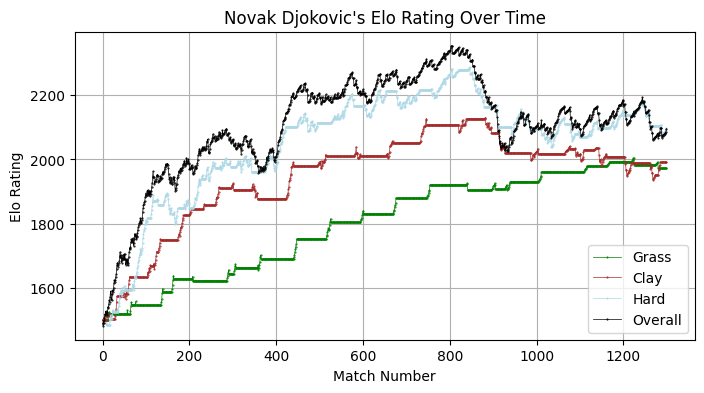

In [20]:
plot_player_elo_graph(104925, "Novak Djokovic")

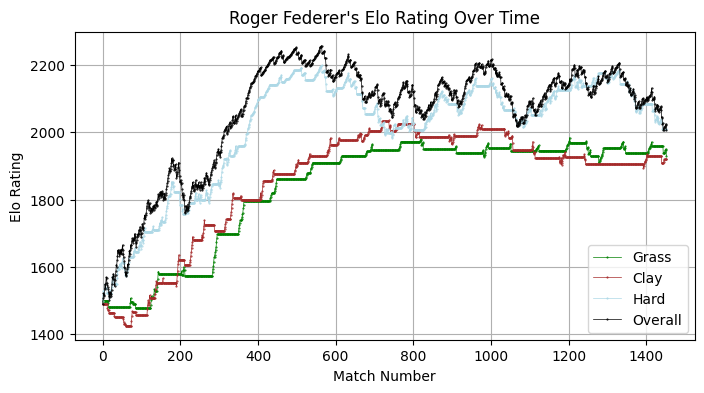

In [21]:
plot_player_elo_graph(103819, "Roger Federer")

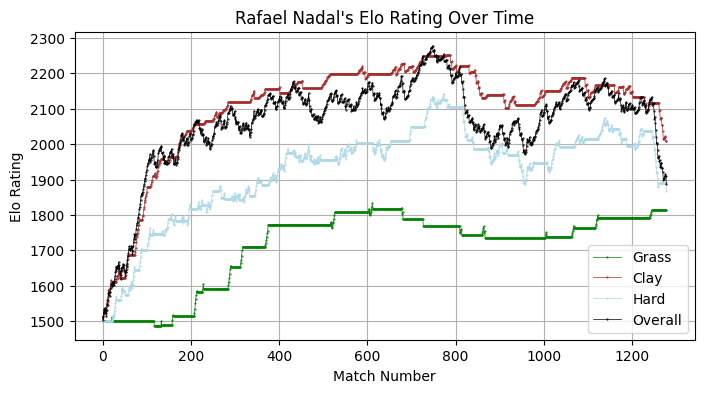

In [22]:
plot_player_elo_graph(104745, "Rafael Nadal")

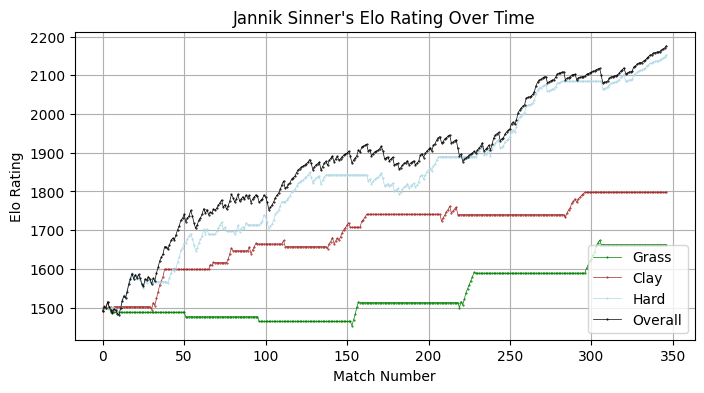

In [23]:
plot_player_elo_graph(206173, "Jannik Sinner")

In [24]:
player = list(all_elo[207989])
player[-1]

2003.0325736257785

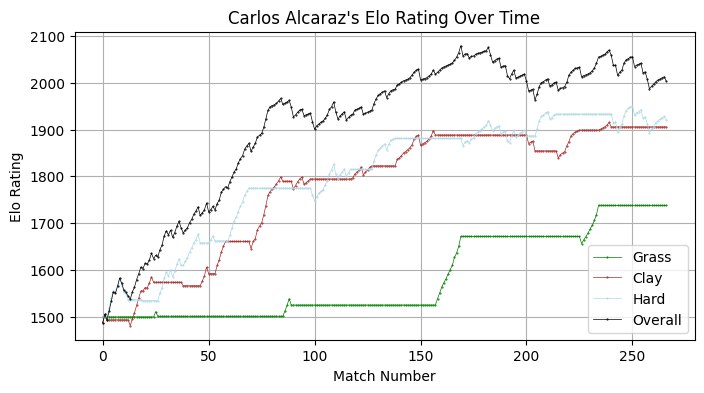

In [25]:
plot_player_elo_graph(207989, "Carlos Alcaraz")

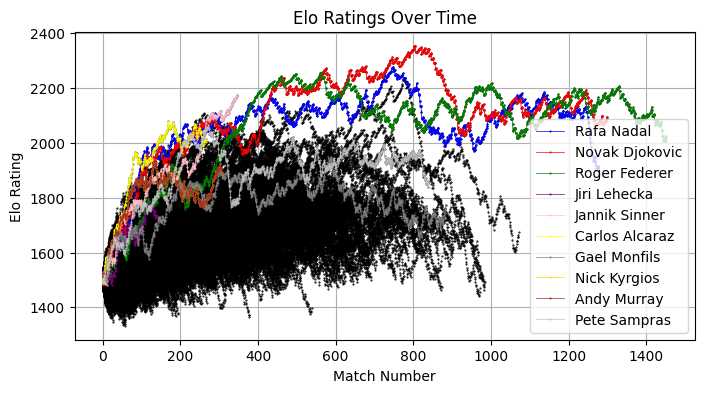

In [26]:
from IPython.display import display
%matplotlib inline
plt.close('all')

nadal = list(all_elo[104745])
novak = list(all_elo[104925])
federer = list(all_elo[103819])
jiri = list(all_elo[208103])
jannik = list(all_elo[206173])
carlos = list(all_elo[207989])
gael = list(all_elo[104792])
nick = list(all_elo[106401])
andy = list(all_elo[104918])
pete = list(all_elo[101736])

# Create a simple line plot
fig = plt.figure(figsize=(8, 4))

for player in all_elo.keys():
    plt.plot(list(all_elo[player]), marker='.', linewidth=0.1, markersize=1, linestyle='-', color='black')

plt.plot(nadal, marker='.', linewidth=0.5, markersize=1, linestyle='-', color='blue', label="Rafa Nadal")
plt.plot(novak, marker='.', linewidth=0.5, markersize=1, linestyle='-', color='red', label="Novak Djokovic")
plt.plot(federer, marker='.', linewidth=0.5, markersize=1, linestyle='-', color='green', label="Roger Federer")
plt.plot(jiri, marker='.', linewidth=0.5, markersize=1, linestyle='-', color='purple', label="Jiri Lehecka")
plt.plot(jannik, marker='.', linewidth=0.5, markersize=1, linestyle='-', color='pink', label="Jannik Sinner")
plt.plot(carlos, marker='.', linewidth=0.5, markersize=1, linestyle='-', color='yellow', label="Carlos Alcaraz")
plt.plot(gael, marker='.', linewidth=0.5, markersize=1, linestyle='-', color='gray', label="Gael Monfils")
plt.plot(nick, marker='.', linewidth=0.5, markersize=1, linestyle='-', color='gold', label="Nick Kyrgios")
plt.plot(nick, marker='.', linewidth=0.5, markersize=1, linestyle='-', color='brown', label="Andy Murray")
plt.plot(pete, marker='.', linewidth=0.5, markersize=1, linestyle='-', color='silver', label="Pete Sampras")

plt.title("Elo Ratings Over Time")
plt.xlabel("Match Number")
plt.ylabel("Elo Rating")

plt.legend(loc="lower right")

plt.grid(True)
plt.savefig("./images/elo_ratings_plot.png", dpi=500)

plt.draw()
plt.show()


### Final tweaks on the dataset

#### Randomize Dataset

In [27]:
final_data["RESULT"] = 1

In [28]:
column_to_randomize = []

for val in list(final_data.columns):
    if "DIFF" in val:
        print(val)
        column_to_randomize.append(val)

column_to_randomize.append("RESULT")
column_to_randomize.append("WINNER_ID")
column_to_randomize.append("LOSER_ID")

final_data[column_to_randomize] = final_data[column_to_randomize].apply(lambda row: row * (-1) if np.random.rand() < 0.5 else row, axis=1)

ATP_POINT_DIFF
ATP_RANK_DIFF
AGE_DIFF
HEIGHT_DIFF
H2H_DIFF
H2H_SURFACE_DIFF
DIFF_N_GAMES
WIN_LAST_3_DIFF
WIN_LAST_5_DIFF
WIN_LAST_10_DIFF
WIN_LAST_25_DIFF
WIN_LAST_50_DIFF
WIN_LAST_100_DIFF
P_ACE_LAST_3_DIFF
P_DF_LAST_3_DIFF
P_1ST_IN_LAST_3_DIFF
P_1ST_WON_LAST_3_DIFF
P_2ND_WON_LAST_3_DIFF
P_BP_SAVED_LAST_3_DIFF
P_ACE_LAST_5_DIFF
P_DF_LAST_5_DIFF
P_1ST_IN_LAST_5_DIFF
P_1ST_WON_LAST_5_DIFF
P_2ND_WON_LAST_5_DIFF
P_BP_SAVED_LAST_5_DIFF
P_ACE_LAST_10_DIFF
P_DF_LAST_10_DIFF
P_1ST_IN_LAST_10_DIFF
P_1ST_WON_LAST_10_DIFF
P_2ND_WON_LAST_10_DIFF
P_BP_SAVED_LAST_10_DIFF
P_ACE_LAST_20_DIFF
P_DF_LAST_20_DIFF
P_1ST_IN_LAST_20_DIFF
P_1ST_WON_LAST_20_DIFF
P_2ND_WON_LAST_20_DIFF
P_BP_SAVED_LAST_20_DIFF
P_ACE_LAST_50_DIFF
P_DF_LAST_50_DIFF
P_1ST_IN_LAST_50_DIFF
P_1ST_WON_LAST_50_DIFF
P_2ND_WON_LAST_50_DIFF
P_BP_SAVED_LAST_50_DIFF
P_ACE_LAST_100_DIFF
P_DF_LAST_100_DIFF
P_1ST_IN_LAST_100_DIFF
P_1ST_WON_LAST_100_DIFF
P_2ND_WON_LAST_100_DIFF
P_BP_SAVED_LAST_100_DIFF
P_ACE_LAST_200_DIFF
P_DF_LAST_200_DIFF
P_1

In [29]:
def fix_ids(row):
    winner, loser = row['WINNER_ID'], row['LOSER_ID']
    if winner < 0 and loser < 0:
        winner, loser = abs(loser), abs(winner)  # Swap and remove negative signs
    return pd.Series([winner, loser])

# Apply transformation
final_data[['WINNER_ID', 'LOSER_ID']] = final_data.apply(fix_ids, axis=1)
final_data.rename(columns={'WINNER_ID': 'PLAYER_1', 'LOSER_ID': 'PLAYER_2'}, inplace=True)

## Plot Datset

In [30]:
final_data

,PLAYER_1,PLAYER_2,ATP_POINT_DIFF,ATP_RANK_DIFF,AGE_DIFF,HEIGHT_DIFF,BEST_OF,DRAW_SIZE,H2H_DIFF,H2H_SURFACE_DIFF,...,ELO_DIFF,ELO_SURFACE_DIFF,ELO_GRAD_5_DIFF,ELO_GRAD_10_DIFF,ELO_GRAD_20_DIFF,ELO_GRAD_35_DIFF,ELO_GRAD_50_DIFF,ELO_GRAD_100_DIFF,ELO_GRAD_250_DIFF,RESULT
0,101142.0,101746.0,1028.0,-69.0,5.000000,5.0,3,32,0.0,0.0,...,24.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
1,101613.0,100587.0,257.0,-126.0,-10.300000,-8.0,3,32,0.0,0.0,...,24.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
2,101601.0,101179.0,-352.0,135.0,-3.700000,-0.0,3,32,-0.0,-0.0,...,-24.000000,-24.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-1.0
3,101332.0,101117.0,-19.0,7.0,-2.000000,-7.0,3,32,-0.0,-0.0,...,-24.000000,-24.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-1.0
4,101901.0,101735.0,-734.0,162.0,-0.900000,-11.0,3,32,0.0,0.0,...,24.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111,104925.0,207989.0,-3110.0,4.0,15.953457,5.0,5,128,1.0,2.0,...,93.297142,175.699868,-0.685904,1.530670,3.116970,1.627271,-1.600634,-0.640399,-1.578129,1.0
112,210097.0,132283.0,1254.0,-35.0,-7.413415,2.0,5,128,0.0,1.0,...,148.049490,154.666406,-6.688210,-2.921914,3.477755,2.555178,1.863525,2.386409,0.000000,1.0
113,200282.0,206173.0,-8295.0,7.0,2.493498,-8.0,5,128,-9.0,-8.0,...,-303.764362,-327.732540,3.868456,-5.110113,-4.547991,-3.631950,-1.387032,-0.508457,-0.613204,-1.0
114,206173.0,210097.0,9550.0,-19.0,1.147844,-2.0,5,128,3.0,2.0,...,390.654026,391.699508,-7.701382,0.587323,0.523377,-0.573950,-0.148565,-0.492939,0.000000,1.0


In [31]:
# sns.pairplot(final_data, hue='RESULT')

![image info](./images/outputAllFeatures.png)

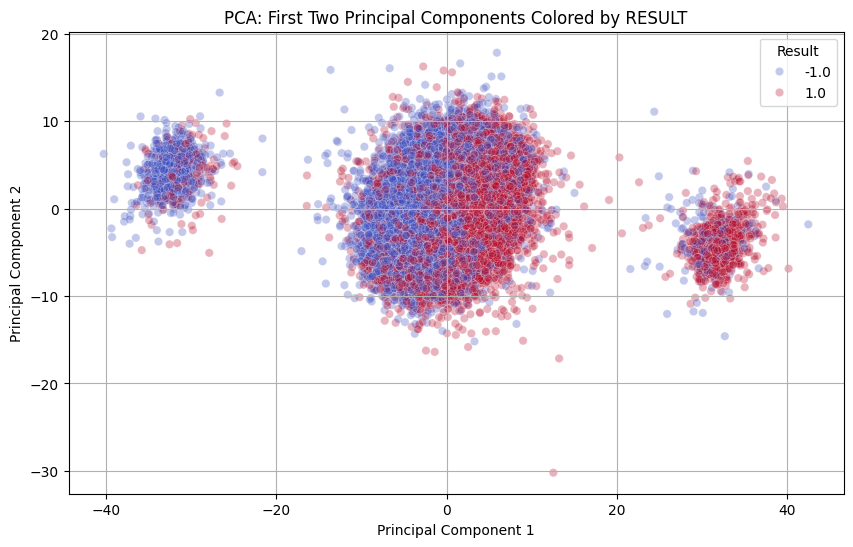

In [32]:
# Drop the target variable ('RESULT') if it exists
features = final_data.drop(columns=['RESULT'], errors='ignore')

# Standardizing the data
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Applying PCA with 9 principal components
pca_9 = PCA(n_components=9)
principal_components_9 = pca_9.fit_transform(features_scaled)

# Creating a DataFrame with the first 9 principal components
pca_df_9 = pd.DataFrame(principal_components_9, columns=[f'PC{i+1}' for i in range(9)])

# Add the RESULT column back to the PCA DataFrame (if it was originally present in the dataset)
pca_df_9['RESULT'] = final_data['RESULT'].values

# Plot the first two principal components with hue set to RESULT
plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_df_9['PC1'], y=pca_df_9['PC2'], hue=pca_df_9['RESULT'], palette='coolwarm', alpha=0.3)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA: First Two Principal Components Colored by RESULT')
plt.legend(title="Result")
plt.grid(True)
plt.show()


In [33]:
pca_df_9

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,RESULT
0,0.119093,0.037195,0.216231,0.068598,-0.371561,0.039442,-0.179140,0.115748,-0.884433,1.0
1,-0.006299,-0.122808,0.084450,0.373817,0.241219,0.290721,0.401418,-0.253941,-0.875648,1.0
2,-0.161038,0.097643,-0.168032,-0.133437,0.281057,0.026767,0.091536,-0.030907,-0.885045,-1.0
3,-0.098290,-0.065336,-0.127873,0.047166,0.086147,-0.055921,0.102373,-0.170292,-0.879716,-1.0
4,-0.194913,-0.086995,-0.177991,0.008696,0.044165,-0.206389,0.027362,-0.153819,-0.875903,1.0
...,...,...,...,...,...,...,...,...,...,...
95486,0.885409,0.556412,0.374165,0.727070,-2.434945,-1.894347,-2.231759,1.804404,3.065668,1.0
95487,3.223520,1.302679,0.341754,1.901426,0.670850,2.590359,2.466482,-0.009433,3.304051,1.0
95488,-5.543490,1.503628,-5.769670,-2.163413,1.184501,-2.986227,-1.183634,-2.558854,3.616109,-1.0
95489,0.076597,-1.100423,5.445086,2.119198,-3.764538,0.425962,0.706466,0.096537,3.581471,1.0


In [34]:
# sns.pairplot(data=pca_df_9, hue="RESULT")

![image info](./images/outputPCA_Pariplot2.png)

In [35]:
if 'ELO_DIFF' in final_data.columns:
    pca_df_9['ELO_DIFF'] = final_data['ELO_DIFF'].values

if 'DIFF_N_GAMES' in final_data.columns:
    pca_df_9['DIFF_N_GAMES'] = final_data['DIFF_N_GAMES'].values

if 'H2H_DIFF' in final_data.columns:
    pca_df_9['H2H_DIFF'] = final_data['H2H_DIFF'].values

if 'P_1ST_WON_LAST_50_DIFF' in final_data.columns:
    pca_df_9['P_1ST_WON_LAST_50_DIFF'] = final_data['P_1ST_WON_LAST_50_DIFF'].values


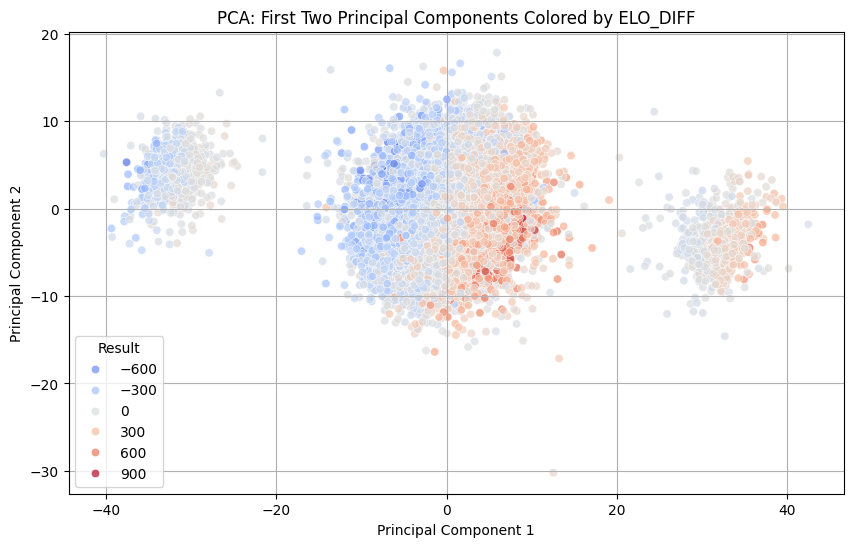

In [36]:
# P_1ST_WON_LAST_50_DIFF
plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_df_9['PC1'], y=pca_df_9['PC2'], hue=pca_df_9['ELO_DIFF'], palette='coolwarm', alpha=0.7)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA: First Two Principal Components Colored by ELO_DIFF')
plt.legend(title="Result")
plt.grid(True)
plt.show()

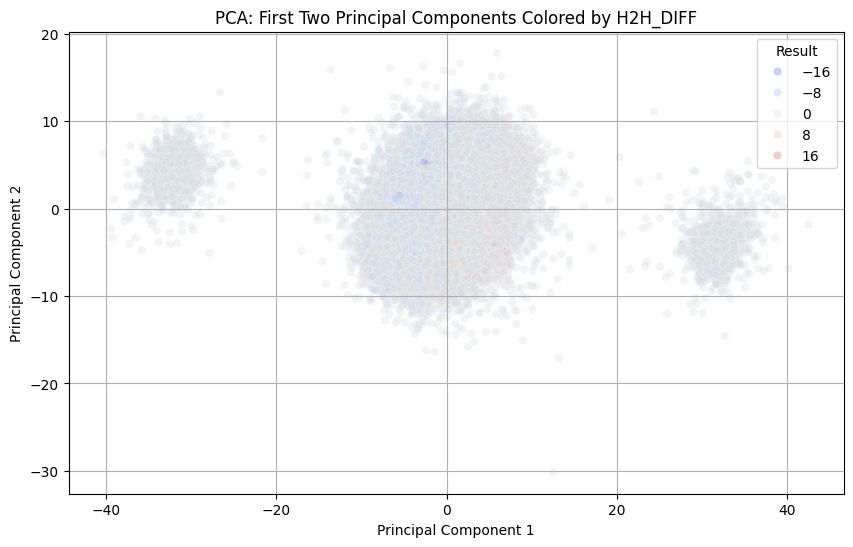

In [37]:
# P_1ST_WON_LAST_50_DIFF
plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_df_9['PC1'], y=pca_df_9['PC2'], hue=pca_df_9['H2H_DIFF'], palette='coolwarm', alpha=0.3)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA: First Two Principal Components Colored by H2H_DIFF')
plt.legend(title="Result")
plt.grid(True)
plt.show()

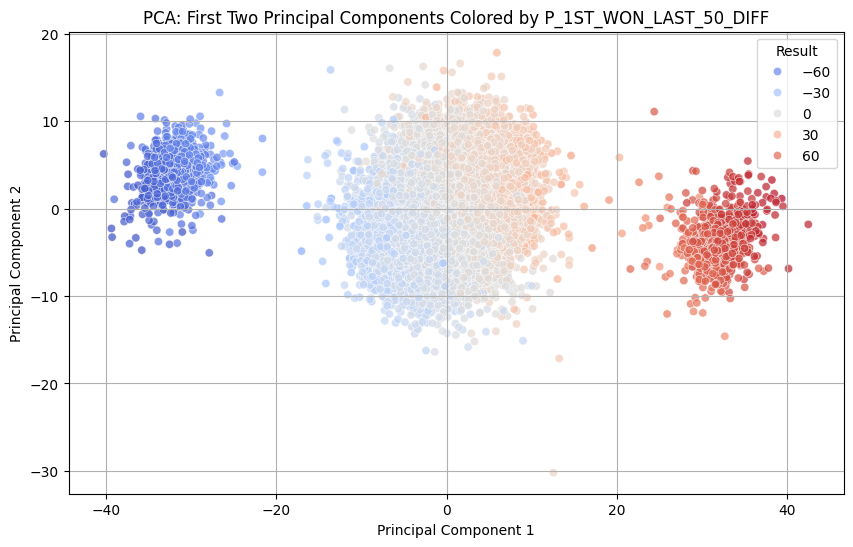

In [38]:
# P_1ST_WON_LAST_50_DIFF
plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_df_9['PC1'], y=pca_df_9['PC2'], hue=pca_df_9['P_1ST_WON_LAST_50_DIFF'], palette='coolwarm', alpha=0.7)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA: First Two Principal Components Colored by P_1ST_WON_LAST_50_DIFF')
plt.legend(title="Result")
plt.grid(True)
plt.show()

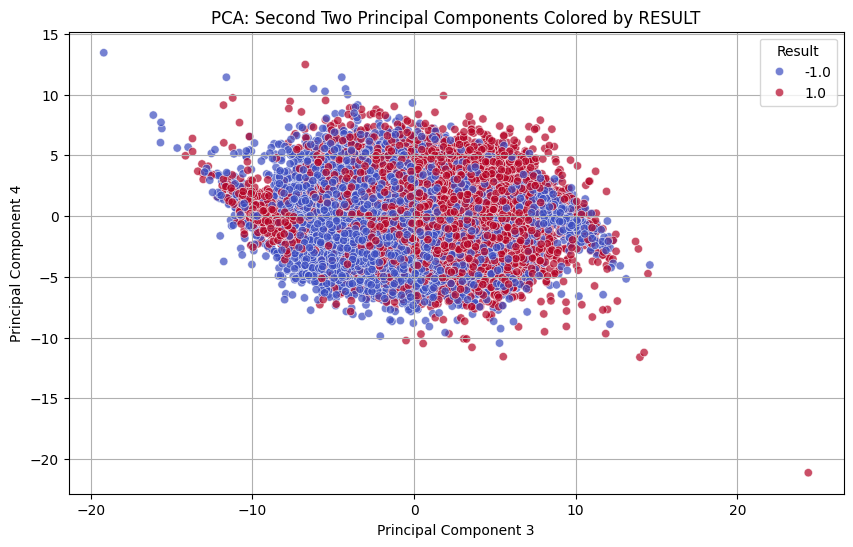

In [39]:
# Plot the first two principal components with hue set to RESULT
plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_df_9['PC3'], y=pca_df_9['PC4'], hue=pca_df_9['RESULT'], palette='coolwarm', alpha=0.7)
plt.xlabel('Principal Component 3')
plt.ylabel('Principal Component 4')
plt.title('PCA: Second Two Principal Components Colored by RESULT')
plt.legend(title="Result")
plt.grid(True)
plt.show()


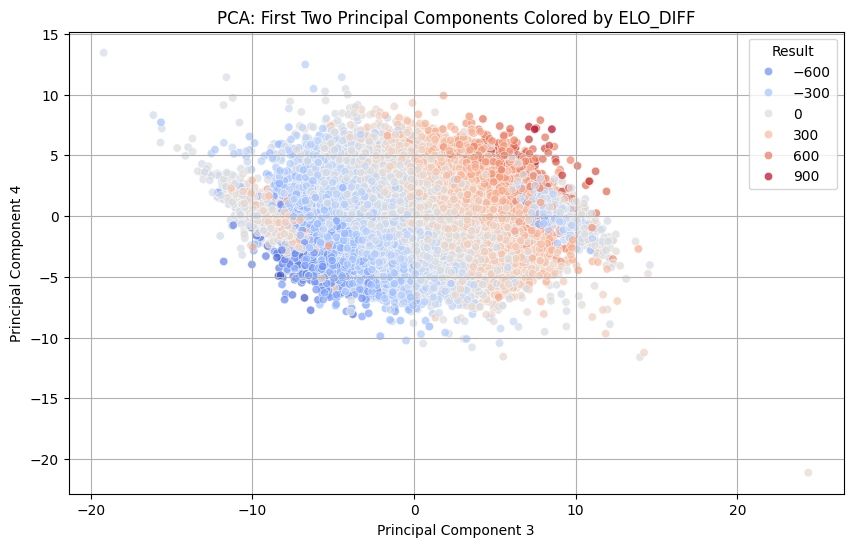

In [40]:
# Plot the first two principal components with hue set to RESULT
plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_df_9['PC3'], y=pca_df_9['PC4'], hue=pca_df_9['ELO_DIFF'], palette='coolwarm', alpha=0.7)
plt.xlabel('Principal Component 3')
plt.ylabel('Principal Component 4')
plt.title('PCA: First Two Principal Components Colored by ELO_DIFF')
plt.legend(title="Result")
plt.grid(True)
plt.show()


In [41]:
# Get PCA loadings (how much each original feature contributes to each principal component)
loadings = pd.DataFrame(pca_9.components_.T, 
                        columns=[f'PC{i+1}' for i in range(9)], 
                        index=features.columns)

# Display absolute contributions of features to PC1 & PC2
print("Feature importance in PC1 and PC2:")
print(loadings[['PC1', 'PC2', 'PC3', 'PC4']].abs().sort_values(by='PC1', ascending=False))


Feature importance in PC1 and PC2:
                               PC1       PC2       PC3       PC4
P_1ST_WON_LAST_100_DIFF   0.179561  0.055030  0.016515  0.019573
P_1ST_WON_LAST_50_DIFF    0.179379  0.055094  0.013056  0.013604
P_1ST_WON_LAST_200_DIFF   0.179210  0.055064  0.020870  0.023312
P_1ST_WON_LAST_300_DIFF   0.178958  0.054997  0.023811  0.024636
P_1ST_WON_LAST_2000_DIFF  0.178495  0.056321  0.029037  0.027145
...                            ...       ...       ...       ...
ELO_GRAD_100_DIFF         0.006074  0.005693  0.033134  0.070088
ELO_GRAD_250_DIFF         0.005337  0.002356  0.025573  0.028081
ELO_GRAD_5_DIFF           0.004848  0.011229  0.030783  0.103215
BEST_OF                   0.001198  0.000836  0.000269  0.002116
DRAW_SIZE                 0.000721  0.001240  0.000182  0.002695

[80 rows x 4 columns]


## Final Dataset

In [42]:
pd.set_option('display.max_columns', None)
final_data.iloc[80000:90000]

,PLAYER_1,PLAYER_2,ATP_POINT_DIFF,ATP_RANK_DIFF,AGE_DIFF,HEIGHT_DIFF,BEST_OF,DRAW_SIZE,H2H_DIFF,H2H_SURFACE_DIFF,DIFF_N_GAMES,WIN_LAST_3_DIFF,WIN_LAST_5_DIFF,WIN_LAST_10_DIFF,WIN_LAST_25_DIFF,WIN_LAST_50_DIFF,WIN_LAST_100_DIFF,P_ACE_LAST_3_DIFF,P_DF_LAST_3_DIFF,P_1ST_IN_LAST_3_DIFF,P_1ST_WON_LAST_3_DIFF,P_2ND_WON_LAST_3_DIFF,P_BP_SAVED_LAST_3_DIFF,P_ACE_LAST_5_DIFF,P_DF_LAST_5_DIFF,P_1ST_IN_LAST_5_DIFF,P_1ST_WON_LAST_5_DIFF,P_2ND_WON_LAST_5_DIFF,P_BP_SAVED_LAST_5_DIFF,P_ACE_LAST_10_DIFF,P_DF_LAST_10_DIFF,P_1ST_IN_LAST_10_DIFF,P_1ST_WON_LAST_10_DIFF,P_2ND_WON_LAST_10_DIFF,P_BP_SAVED_LAST_10_DIFF,P_ACE_LAST_20_DIFF,P_DF_LAST_20_DIFF,P_1ST_IN_LAST_20_DIFF,P_1ST_WON_LAST_20_DIFF,P_2ND_WON_LAST_20_DIFF,P_BP_SAVED_LAST_20_DIFF,P_ACE_LAST_50_DIFF,P_DF_LAST_50_DIFF,P_1ST_IN_LAST_50_DIFF,P_1ST_WON_LAST_50_DIFF,P_2ND_WON_LAST_50_DIFF,P_BP_SAVED_LAST_50_DIFF,P_ACE_LAST_100_DIFF,P_DF_LAST_100_DIFF,P_1ST_IN_LAST_100_DIFF,P_1ST_WON_LAST_100_DIFF,P_2ND_WON_LAST_100_DIFF,P_BP_SAVED_LAST_100_DIFF,P_ACE_LAST_200_DIFF,P_DF_LAST_200_DIFF,P_1ST_IN_LAST_200_DIFF,P_1ST_WON_LAST_200_DIFF,P_2ND_WON_LAST_200_DIFF,P_BP_SAVED_LAST_200_DIFF,P_ACE_LAST_300_DIFF,P_DF_LAST_300_DIFF,P_1ST_IN_LAST_300_DIFF,P_1ST_WON_LAST_300_DIFF,P_2ND_WON_LAST_300_DIFF,P_BP_SAVED_LAST_300_DIFF,P_ACE_LAST_2000_DIFF,P_DF_LAST_2000_DIFF,P_1ST_IN_LAST_2000_DIFF,P_1ST_WON_LAST_2000_DIFF,P_2ND_WON_LAST_2000_DIFF,P_BP_SAVED_LAST_2000_DIFF,ELO_DIFF,ELO_SURFACE_DIFF,ELO_GRAD_5_DIFF,ELO_GRAD_10_DIFF,ELO_GRAD_20_DIFF,ELO_GRAD_35_DIFF,ELO_GRAD_50_DIFF,ELO_GRAD_100_DIFF,ELO_GRAD_250_DIFF,RESULT
80000,106432.0,105051.0,841.0,-32.0,-9.0,0.0,3,64,0.0,0.0,44.0,0.000000,0.0,0.1,0.080000,0.140000,0.210000,-7.909074,0.010071,6.121021,0.300859,12.777386,11.489899,-4.510451,-1.509037,5.191405,-2.438532,8.126696,-1.439394,-4.103362,-3.562975,4.886677,-1.394833,6.877268,-1.775719,-0.814521,-4.925362,3.156665,0.426367,6.865983,-2.843487,-0.008587,-3.660038,1.812696,0.620852,7.468817,-1.269394,0.494546,-4.224958,3.652874,1.978027,9.236347,7.032683,-0.381343,-3.205509,1.335620,1.014764,6.839575,6.514740,-0.330893,-3.224492,1.181735,1.066272,6.954831,6.444261,-0.330893,-3.224492,1.181735,1.066272,6.954831,6.444261,196.379676,196.931634,-6.683133,-6.000999,-3.123984,-2.824546,-1.229468,1.160180,0.000000,1.0
80001,105453.0,103819.0,-4170.0,10.0,-8.4,-7.0,3,64,-3.0,-3.0,-841.0,-0.000000,-0.0,-0.0,-0.120000,-0.180000,-0.220000,-3.024161,0.165474,-1.034585,-7.817334,8.493338,-2.020202,-0.050255,-1.170738,2.624205,-3.164738,5.775726,-26.545455,-4.196880,-1.505794,-0.530155,-4.354268,-0.677347,-16.478843,-7.318395,0.256344,-3.303487,-10.098619,-2.941912,-9.927525,-7.707812,0.484872,-2.504935,-10.699404,-6.620545,-10.252418,-8.150531,0.435816,-1.508813,-9.850421,-6.912311,-2.601246,-7.533149,0.570519,-2.326722,-8.900513,-5.624917,-5.056271,-6.564438,0.858308,-2.664458,-7.767955,-4.888436,-4.988310,-5.820750,1.090205,-1.301195,-6.955437,-5.241203,-6.999375,-230.922669,-266.413618,2.879421,2.598731,3.926027,2.081096,1.260959,-1.479487,-0.705876,-1.0
80002,104925.0,100644.0,1690.0,-2.0,9.9,-10.0,3,64,-1.0,0.0,708.0,0.000000,0.2,0.4,0.240000,0.020000,0.060000,-0.490653,-0.745937,10.092791,4.061257,-3.343455,-4.444444,-3.005826,-1.188797,6.777775,1.056150,3.188732,20.666667,-3.994266,-1.683183,5.229770,0.687441,5.897621,23.238095,-3.113682,-1.011088,3.132612,-4.569715,2.381091,21.251717,-2.058985,-0.422526,2.345259,-0.868513,-0.527568,8.772285,-3.872143,-0.951454,2.241283,-1.305443,0.602446,4.386463,-3.463544,-1.449574,2.770919,0.046172,3.036140,2.844200,-2.483147,-1.922876,3.606234,1.658202,4.898939,2.703730,-1.885791,-1.617312,2.405467,1.000547,3.820978,3.747799,214.221116,317.155199,3.054860,7.272872,6.182346,3.970402,0.090597,-2.478836,-2.939864,1.0
80003,103819.0,106432.0,5085.0,-17.0,15.3,-3.0,3,64,1.0,2.0,1149.0,-0.000000,-0.0,0.1,0.160000,0.200000,0.300000,-0.883370,-0.024985,-1.525408,-2.265519,-24.141975,-10.656566,2.609052,-0.303428,-5.019174,1.652659,-14.206773,2.318182,4.281243,0.336859,-2.161520,3.5069

In [43]:
# final_data.to_csv("./data/final_dataset.csv", index=False)

In [44]:
# REMOVE FEATURES???

# for feature in final_data.keys()[2:]:
#     if feature not in ['WIN_LAST_10_DIFF','WIN_LAST_25_DIFF','P_1ST_WON_LAST_100_DIFF','P_2ND_WON_LAST_100_DIFF','P_BP_SAVED_LAST_100_DIFF','ELO_DIFF','ELO_SURFACE_DIFF','RESULT']:
#         final_data = final_data.drop(feature, axis=1)


### Split training vs testing data

In [45]:
data_np = final_data.to_numpy(dtype=object)[:95375, 2:]
np.random.shuffle(data_np)
data_np

array([[-502.0, 219.0, 4.399999999999999, ..., -0.0, -0.0, -1.0],
       [2468.0, -388.0, 11.299999999999997, ..., 0.0, 0.0, 1.0],
       [-3285.0, 111.0, 6.399999999999999, ..., -1.8881556361374479,
        -0.0, -1.0],
       ...,
       [-170.0, 8.0, -5.0, ..., -0.04992531645816922,
        0.015215482965901264, -1.0],
       [-50.0, 4.0, 0.0, ..., 1.5742300179550592, 0.0, 1.0],
       [-3536.0, 67.0, 0.5, ..., -0.0, -0.0, -1.0]], dtype=object)

In [46]:
split = 0.85
total_rows = final_data.shape[0]
value = round(split*total_rows)

data_np_train = data_np[:value,:]
data_np_test = data_np[value:,:]

In [47]:
mapper = np.vectorize(lambda x: "Player 2 Wins" if x == -1 else "Player 1 Wins")
reverse_mapper = np.vectorize(lambda x: 0 if x == "Player 2 Wins" else 1)
custom_mapper = np.vectorize(lambda x: 0 if x == -1 else 1)
x_train = data_np_train[:,:-1]
x_test = data_np_test[:,:-1]
y_pred_train = mapper(data_np_train[:,-1:])
y_pred_test = mapper(data_np_test[:,-1:])

In [48]:
from sklearn.metrics import accuracy_score
# Note that for some of the features are switched (like ATP_RANK_DIFF, where more positive is better)
total_features = final_data.keys()[2:]

for i in range(data_np_test.shape[1]):
    elo_pred = []

    for row in data_np_test[:,i:i+1]:
        if row[0] > 0:
            elo_pred.append("Player 1 Wins")
        else:
            elo_pred.append("Player 2 Wins")

    print(total_features[i]+": "+str(accuracy_score(y_pred_test, elo_pred)))
    


ATP_POINT_DIFF: 0.6444256756756757
ATP_RANK_DIFF: 0.3557150900900901
AGE_DIFF: 0.4900760135135135
HEIGHT_DIFF: 0.5278716216216216
BEST_OF: 0.504786036036036
DRAW_SIZE: 0.504786036036036
H2H_DIFF: 0.542652027027027
H2H_SURFACE_DIFF: 0.5291385135135135
DIFF_N_GAMES: 0.6077561936936937
WIN_LAST_3_DIFF: 0.5449042792792793
WIN_LAST_5_DIFF: 0.5698902027027027
WIN_LAST_10_DIFF: 0.597339527027027
WIN_LAST_25_DIFF: 0.6228885135135135
WIN_LAST_50_DIFF: 0.6321086711711712
WIN_LAST_100_DIFF: 0.6377393018018018
P_ACE_LAST_3_DIFF: 0.5411739864864865
P_DF_LAST_3_DIFF: 0.4798704954954955
P_1ST_IN_LAST_3_DIFF: 0.5228040540540541
P_1ST_WON_LAST_3_DIFF: 0.5665822072072072
P_2ND_WON_LAST_3_DIFF: 0.5507460585585585
P_BP_SAVED_LAST_3_DIFF: 0.5291385135135135
P_ACE_LAST_5_DIFF: 0.5483530405405406
P_DF_LAST_5_DIFF: 0.47853322072072074
P_1ST_IN_LAST_5_DIFF: 0.5304054054054054
P_1ST_WON_LAST_5_DIFF: 0.5677083333333334
P_2ND_WON_LAST_5_DIFF: 0.5670045045045045
P_BP_SAVED_LAST_5_DIFF: 0.5341356981981982
P_ACE_LAS

In [49]:
final_data.keys()

Index(['PLAYER_1', 'PLAYER_2', 'ATP_POINT_DIFF', 'ATP_RANK_DIFF', 'AGE_DIFF',
       'HEIGHT_DIFF', 'BEST_OF', 'DRAW_SIZE', 'H2H_DIFF', 'H2H_SURFACE_DIFF',
       'DIFF_N_GAMES', 'WIN_LAST_3_DIFF', 'WIN_LAST_5_DIFF',
       'WIN_LAST_10_DIFF', 'WIN_LAST_25_DIFF', 'WIN_LAST_50_DIFF',
       'WIN_LAST_100_DIFF', 'P_ACE_LAST_3_DIFF', 'P_DF_LAST_3_DIFF',
       'P_1ST_IN_LAST_3_DIFF', 'P_1ST_WON_LAST_3_DIFF',
       'P_2ND_WON_LAST_3_DIFF', 'P_BP_SAVED_LAST_3_DIFF', 'P_ACE_LAST_5_DIFF',
       'P_DF_LAST_5_DIFF', 'P_1ST_IN_LAST_5_DIFF', 'P_1ST_WON_LAST_5_DIFF',
       'P_2ND_WON_LAST_5_DIFF', 'P_BP_SAVED_LAST_5_DIFF', 'P_ACE_LAST_10_DIFF',
       'P_DF_LAST_10_DIFF', 'P_1ST_IN_LAST_10_DIFF', 'P_1ST_WON_LAST_10_DIFF',
       'P_2ND_WON_LAST_10_DIFF', 'P_BP_SAVED_LAST_10_DIFF',
       'P_ACE_LAST_20_DIFF', 'P_DF_LAST_20_DIFF', 'P_1ST_IN_LAST_20_DIFF',
       'P_1ST_WON_LAST_20_DIFF', 'P_2ND_WON_LAST_20_DIFF',
       'P_BP_SAVED_LAST_20_DIFF', 'P_ACE_LAST_50_DIFF', 'P_DF_LAST_50_DIFF',
      

# Train Dataset

In [50]:
from DecisionTree import DecisionTree
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.tree import plot_tree

### Decision Tree with Sklearn

In [51]:
# Instantiate a Decision Tree
decision_sklearn = DecisionTreeClassifier(max_depth=4)
decision_sklearn = decision_sklearn.fit(data_np_train[:,:-1], y_pred_train)

# Make predictions and test accuracy
predictions_test = decision_sklearn.predict(data_np_test[:,:-1])
predictions_train = decision_sklearn.predict(data_np_train[:,:-1])
print("Train Accuracy: "+str(accuracy_score(y_pred_train, predictions_train)))
print("Test Accuracy: "+str(accuracy_score(y_pred_test, predictions_test)))

Train Accuracy: 0.7515862357854793
Test Accuracy: 0.752956081081081


In [52]:
my_tree = DecisionTreeClassifier(max_depth=10)
my_tree = my_tree.fit(data_np_train[:,:-1], y_pred_train)

In [53]:
from sklearn import tree
text_representation = tree.export_text(decision_sklearn, feature_names=final_data.columns[2:-1])
print(text_representation)

|--- ELO_SURFACE_DIFF <= 0.13
|   |--- ELO_DIFF <= -97.88
|   |   |--- ELO_DIFF <= -205.28
|   |   |   |--- ELO_DIFF <= -317.32
|   |   |   |   |--- class: Player 2 Wins
|   |   |   |--- ELO_DIFF >  -317.32
|   |   |   |   |--- class: Player 2 Wins
|   |   |--- ELO_DIFF >  -205.28
|   |   |   |--- WIN_LAST_50_DIFF <= -0.16
|   |   |   |   |--- class: Player 2 Wins
|   |   |   |--- WIN_LAST_50_DIFF >  -0.16
|   |   |   |   |--- class: Player 2 Wins
|   |--- ELO_DIFF >  -97.88
|   |   |--- DIFF_N_GAMES <= -56.50
|   |   |   |--- WIN_LAST_50_DIFF <= -0.05
|   |   |   |   |--- class: Player 1 Wins
|   |   |   |--- WIN_LAST_50_DIFF >  -0.05
|   |   |   |   |--- class: Player 2 Wins
|   |   |--- DIFF_N_GAMES >  -56.50
|   |   |   |--- ELO_DIFF <= -0.79
|   |   |   |   |--- class: Player 2 Wins
|   |   |   |--- ELO_DIFF >  -0.79
|   |   |   |   |--- class: Player 2 Wins
|--- ELO_SURFACE_DIFF >  0.13
|   |--- ELO_DIFF <= 104.12
|   |   |--- WIN_LAST_100_DIFF <= 0.04
|   |   |   |--- ELO_DIFF <

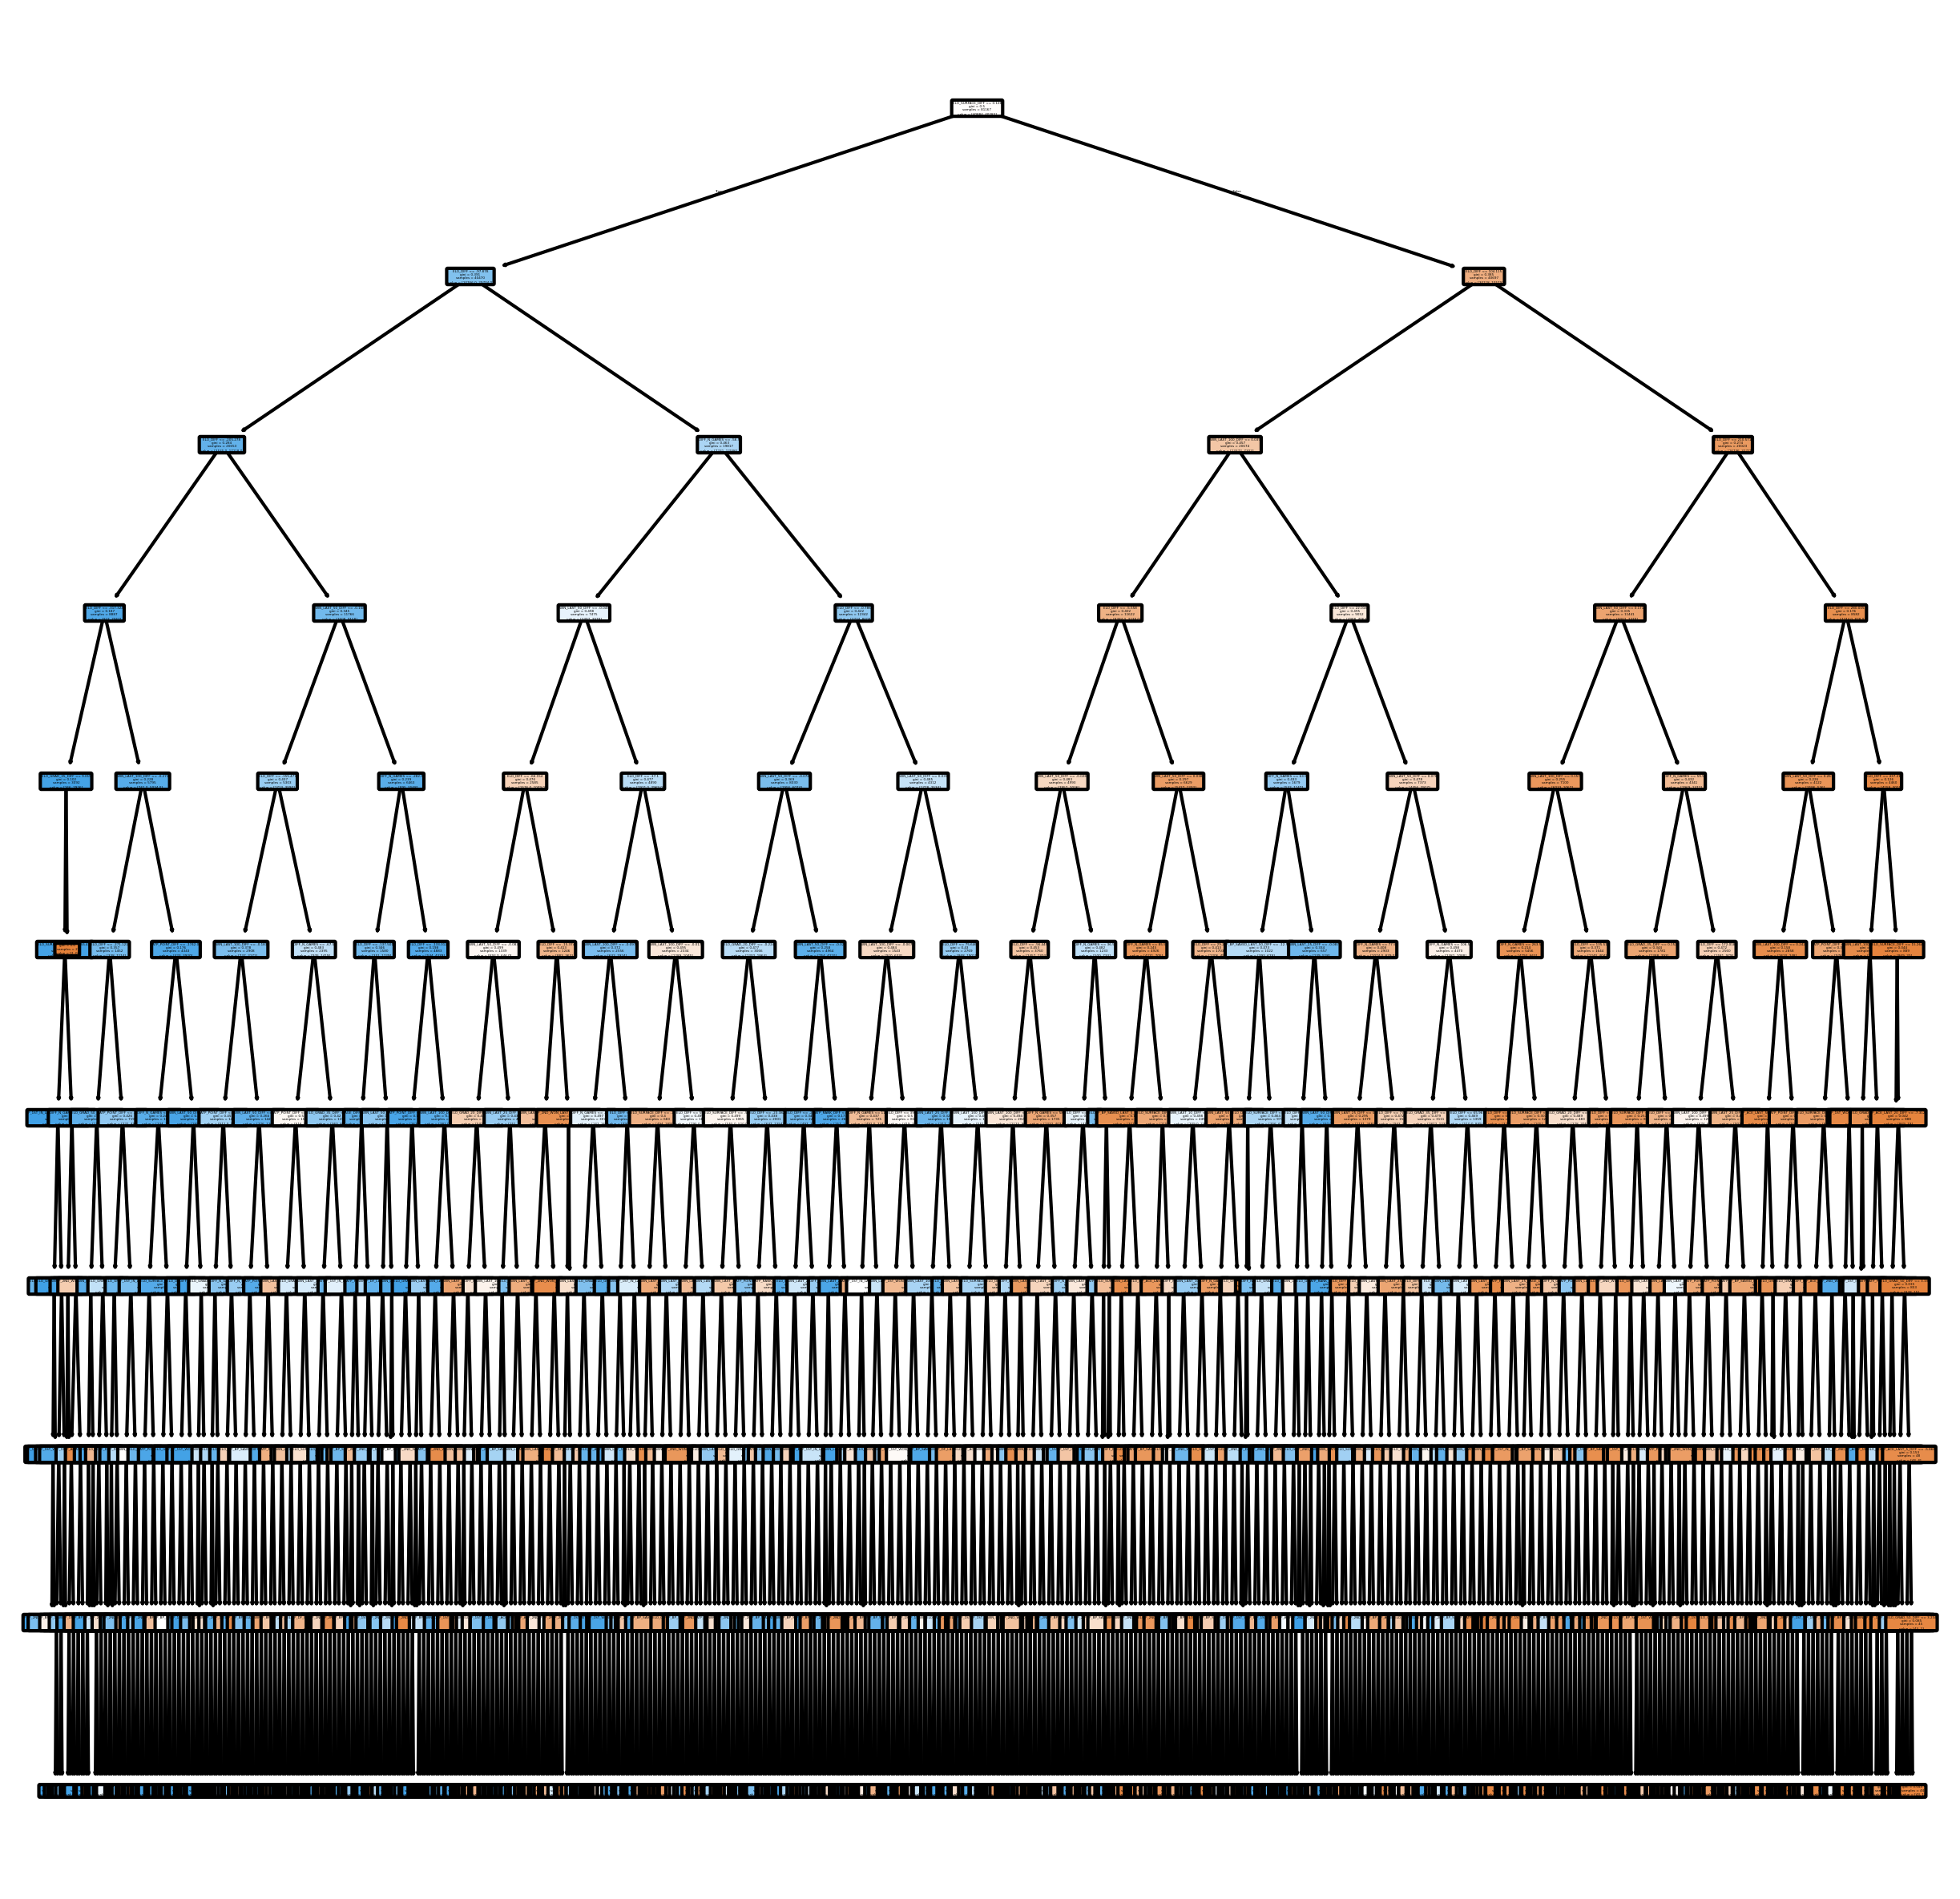

In [54]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (10,10), dpi=300)
plot_tree(my_tree,filled=True,rounded=True, ax=axes, feature_names=final_data.columns[2:-1])
plt.savefig('./images/decision_tree_smaller_1.png', format='png', dpi=300)

### Decision Tree (own implementation)

In [55]:
# Turns out my implementation is horribly slow and it takes too much time haha
n = 300
data_decision_tree_train = data_np_train[:n,:-1] + custom_mapper(data_np_train[:n,-1:])
data_decision_tree_test = data_np_test[:n,:-1] + custom_mapper(data_np_test[:n,-1:])
my_decision_tree = DecisionTree.DecisionTree(max_depth=20)

In [56]:
my_decision_tree.build_tree(data=data_decision_tree_train)

In [57]:
my_decision_tree.print_tree()

Feature 12 < 0.42
Left:
  Leaf: 0
Right:
  Leaf: 1


### Random Forest with Sklearn

In [58]:
# Instantiate a RandomForest
forest_sklearn = RandomForestClassifier(n_estimators=500, max_depth=10, max_features="sqrt", bootstrap=True)
forest_sklearn = forest_sklearn.fit(x_train, y_pred_train)

# Make predictions and test accuracy
predictions_train = forest_sklearn.predict(x_train)
predictions_test = forest_sklearn.predict(x_test)
print("Train Accuracy: "+str(accuracy_score(y_pred_train, predictions_train)))
print("Test Accuracy: "+str(accuracy_score(y_pred_test, predictions_test)))

/opt/homebrew/anaconda3/envs/neuralNets/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Train Accuracy: 0.7977503172471571
Test Accuracy: 0.7697072072072072


In [59]:
forest_sklearn.feature_importances_

array([0.04918888, 0.03762357, 0.00993898, 0.00188509, 0.00093789,
       0.00134462, 0.00134715, 0.00104079, 0.01854877, 0.00078888,
       0.00301709, 0.01048068, 0.02751172, 0.04404203, 0.04996461,
       0.00288281, 0.00288091, 0.00277084, 0.00428079, 0.0034564 ,
       0.00275129, 0.00256569, 0.00285929, 0.00264175, 0.00426855,
       0.00361897, 0.00281447, 0.00263805, 0.00274242, 0.0026576 ,
       0.00511822, 0.00562263, 0.00277049, 0.0023253 , 0.00259106,
       0.00250525, 0.00694399, 0.00752127, 0.00290584, 0.00230841,
       0.00241662, 0.00237312, 0.00694336, 0.00961743, 0.00340622,
       0.00228077, 0.00230398, 0.00235278, 0.00660611, 0.01423776,
       0.00365076, 0.00226681, 0.00236335, 0.00231979, 0.00481297,
       0.01491008, 0.00358462, 0.0021716 , 0.00231269, 0.00236823,
       0.00362976, 0.01045483, 0.00395459, 0.00219439, 0.00232388,
       0.0023579 , 0.00358087, 0.00850818, 0.00387601, 0.24983832,
       0.24844312, 0.00336279, 0.0035194 , 0.0042443 , 0.00424

Okay, this is actually really overfitted (did not realize it was this much haha). Let's try some other parameters to see what happens

In [60]:
# Instantiate a RandomForest
forest_sklearn = RandomForestClassifier(n_estimators=200, max_depth=9, max_features="log2", bootstrap=True)
forest_sklearn = forest_sklearn.fit(data_np_train[:,:-1], y_pred_train)

# Make predictions and test accuracy
predictions_test = forest_sklearn.predict(data_np_test[:,:-1])
predictions_train = forest_sklearn.predict(data_np_train[:,:-1])
print("Train Accuracy: "+str(accuracy_score(y_pred_train, predictions_train)))
print("Test Accuracy: "+str(accuracy_score(y_pred_test, predictions_test)))

/opt/homebrew/anaconda3/envs/neuralNets/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Train Accuracy: 0.7739105794226718
Test Accuracy: 0.7567567567567568


Okay, let me quickly visualize a smaller random forest

In [61]:
# test_random = RandomForestClassifier(n_estimators=100, max_depth=7, min_samples_split=400, min_samples_leaf=250, max_features="sqrt", bootstrap=True)
# test_random = test_random.fit(data_np_train[:5000,:-1], y_pred_train[:5000,:])

# fig, axes = plt.subplots(nrows=7, ncols=14, figsize=(16*1.5, 9*1.5), dpi=900)
# axes = axes.flatten()  # Convert to a 1D array for easier indexing

# num_estimators = min((7*14)-3, len(test_random.estimators_))  # Avoid out-of-bounds errors

# for index in range(num_estimators):
#     tree.plot_tree(test_random.estimators_[index],
#                    feature_names=final_data.columns[2:-1],
#                    filled=True,
#                    ax=axes[index])

#     axes[index].set_title(f'Estimator: {index}', fontsize=11)

# # Hide any unused subplots
# # for i in range(num_estimators, 100):
# #     fig.delaxes(axes[i])

# fig.tight_layout()
# fig.savefig('./images/random_forest/final_rf_100_max_depth.png')


# # fig, axes = plt.subplots(nrows = 1,ncols = 5,figsize = (10,2), dpi=100)
# # for index in range(0, 5):
# #     tree.plot_tree(test_random.estimators_[index],
# #                    feature_names = final_data.columns[2:-1], 
# #                    filled = True,
# #                    ax = axes[index])

# #     axes[index].set_title('Estimator: ' + str(index), fontsize = 11)
# # fig.savefig('rf_5trees.png')

![image info](./images/random_forest/final_rf_100_max_depth.png)

### XGBoost with Sklearn

In [62]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Instantiate an XGBoost Classifier
xgb_model = XGBClassifier(n_estimators=200, max_depth=10, learning_rate=0.1, subsample=0.8, colsample_bytree=0.7)

# Train the model
xgb_model.fit(data_np_train[:, :-1], reverse_mapper(y_pred_train))

# Make predictions
predictions_test = xgb_model.predict(data_np_test[:, :-1])
predictions_train = xgb_model.predict(data_np_train[:, :-1])

# Calculate accuracy
print("Train Accuracy: " + str(accuracy_score(reverse_mapper(y_pred_train), predictions_train)))
print("Test Accuracy: " + str(accuracy_score(reverse_mapper(y_pred_test), predictions_test)))


Train Accuracy: 0.9961314327251223
Test Accuracy: 0.8505067567567568


In [63]:
# Sorting by importance in descending order
sorted_mapped_results = sorted(
    list(zip(final_data.columns[2:-1], list(xgb_model.feature_importances_))),
    key=lambda x: x[1], 
    reverse=True
)

# Extracting sorted labels and their importances
sorted_labels = [label for label, importance in sorted_mapped_results]
sorted_importances = [importance for _, importance in sorted_mapped_results]

# Displaying results
for label, importance in sorted_mapped_results:
    print(f"{label}: {importance:.4f}")


ELO_SURFACE_DIFF: 0.0989
ELO_DIFF: 0.0544
WIN_LAST_50_DIFF: 0.0382
WIN_LAST_100_DIFF: 0.0283
WIN_LAST_25_DIFF: 0.0273
DIFF_N_GAMES: 0.0239
ATP_POINT_DIFF: 0.0223
WIN_LAST_10_DIFF: 0.0190
ELO_GRAD_50_DIFF: 0.0165
ELO_GRAD_35_DIFF: 0.0165
BEST_OF: 0.0161
ELO_GRAD_20_DIFF: 0.0155
ELO_GRAD_100_DIFF: 0.0147
ATP_RANK_DIFF: 0.0140
WIN_LAST_5_DIFF: 0.0140
ELO_GRAD_250_DIFF: 0.0125
ELO_GRAD_10_DIFF: 0.0118
AGE_DIFF: 0.0112
WIN_LAST_3_DIFF: 0.0110
ELO_GRAD_5_DIFF: 0.0104
P_2ND_WON_LAST_2000_DIFF: 0.0101
H2H_DIFF: 0.0101
P_2ND_WON_LAST_100_DIFF: 0.0100
H2H_SURFACE_DIFF: 0.0100
P_ACE_LAST_2000_DIFF: 0.0099
P_1ST_WON_LAST_2000_DIFF: 0.0098
P_1ST_WON_LAST_200_DIFF: 0.0098
P_BP_SAVED_LAST_2000_DIFF: 0.0098
P_2ND_WON_LAST_300_DIFF: 0.0096
P_BP_SAVED_LAST_300_DIFF: 0.0096
P_BP_SAVED_LAST_200_DIFF: 0.0095
P_BP_SAVED_LAST_100_DIFF: 0.0095
P_ACE_LAST_200_DIFF: 0.0094
P_2ND_WON_LAST_10_DIFF: 0.0094
P_2ND_WON_LAST_200_DIFF: 0.0094
P_ACE_LAST_50_DIFF: 0.0093
P_1ST_WON_LAST_20_DIFF: 0.0092
P_2ND_WON_LAST_50_D

### Basic Neural Net with Tensorflow

In [64]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import StandardScaler

# Normalize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(data_np_train[:, :-1])
X_test = scaler.transform(data_np_test[:, :-1])

# Define the neural network
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),  # First hidden layer
    layers.Dense(32, activation='relu'),  # Second hidden layer
    layers.Dense(16, activation='relu'),  # Third hidden layer
    layers.Dense(1, activation='sigmoid')  # Output layer (for binary classification)
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, reverse_mapper(y_pred_train), epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate on test set
train_loss, train_acc = model.evaluate(X_train, reverse_mapper(y_pred_train), verbose=0)
test_loss, test_acc = model.evaluate(X_test, reverse_mapper(y_pred_test), verbose=0)

print(f"Train Accuracy: {train_acc}")
print(f"Test Accuracy: {test_acc}")


Epoch 1/50


/opt/homebrew/anaconda3/envs/neuralNets/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2030/2030 ━━━━━━━━━━━━━━━━━━━━ 2s 631us/step - accuracy: 0.7303 - loss: 0.5342 - val_accuracy: 0.7954 - val_loss: 0.4456
Epoch 2/50
2030/2030 ━━━━━━━━━━━━━━━━━━━━ 1s 581us/step - accuracy: 0.8072 - loss: 0.4236 - val_accuracy: 0.8177 - val_loss: 0.4103
Epoch 3/50
2030/2030 ━━━━━━━━━━━━━━━━━━━━ 1s 613us/step - accuracy: 0.8248 - loss: 0.3939 - val_accuracy: 0.8260 - val_loss: 0.3966
Epoch 4/50
2030/2030 ━━━━━━━━━━━━━━━━━━━━ 1s 589us/step - accuracy: 0.8303 - loss: 0.3846 - val_accuracy: 0.8285 - val_loss: 0.3942
Epoch 5/50
2030/2030 ━━━━━━━━━━━━━━━━━━━━ 1s 581us/step - accuracy: 0.8337 - loss: 0.3789 - val_accuracy: 0.8313 - val_loss: 0.3899
Epoch 6/50
2030/2030 ━━━━━━━━━━━━━━━━━━━━ 1s 597us/step - accuracy: 0.8356 - loss: 0.3715 - val_accuracy: 0.8295 - val_loss: 0.3915
Epoch 7/50
2030/2030 ━━━━━━━━━━━━━━━━━━━━ 1s 590us/step - accuracy: 0.8394 - loss: 0.3673 - val_accuracy: 0.8315 - val_loss: 0.3890
Epoch 8/50
2030/2030 ━━━━━━━━━━━━━━━━━━━━ 1s 600us/step - accuracy: 0.8437 - loss: 0.36

## GridSearch CV

Trying GridSearchCV to see what happens

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [6, 10, 15],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8]
}

# Instantiate an XGBoost Classifier
xgb_model = XGBClassifier()

# Perform GridSearchCV
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='accuracy', cv=5, verbose=3, n_jobs=-1)
grid_search.fit(data_np_train[:, :-1], reverse_mapper(y_pred_train))

# Best parameters
print("Best Parameters:", grid_search.best_params_)

# Train the best model
best_xgb_model = grid_search.best_estimator_

# Make predictions
predictions_test = best_xgb_model.predict(data_np_test[:, :-1])
predictions_train = best_xgb_model.predict(data_np_train[:, :-1])

# Calculate accuracy
print("Train Accuracy:", accuracy_score(reverse_mapper(y_pred_train), predictions_train))
print("Test Accuracy:", accuracy_score(reverse_mapper(y_pred_test), predictions_test))


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 15, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
    'max_features': ['sqrt', 'log2']
}

grid_search = GridSearchCV(
    estimator=RandomForestClassifier(),
    param_grid=param_grid,
    cv=5,  # 5-fold cross-validation
    n_jobs=-1,
    verbose=4
)
grid_search.fit(data_np_train[:,:-1], y_pred_train.squeeze())

print("Best params:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)


## Predict Australian Open 2025

In [65]:
# Australian Open Data
aus_data_np = final_data.to_numpy(dtype=object)[95375:, 2:]
full_aus_data_np = final_data.iloc[95375:, :]

x_test_aus = aus_data_np[:,:-1]
y_pred_test_aus = mapper(aus_data_np[:,-1:])

In [66]:
# Make predictions
predictions_test = xgb_model.predict(aus_data_np[:, :-1])

# Calculate accuracy
print("Accuracy: " + str(accuracy_score(reverse_mapper(y_pred_test_aus), predictions_test)))


Accuracy: 0.8448275862068966


In [67]:
full_aus_data_np["PREDICTION"] = list(predictions_test)
full_aus_data_np

/var/folders/2n/3gvc3mg10j76nnrf7fqlxh640000gn/T/ipykernel_10163/4142515727.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  full_aus_data_np["PREDICTION"] = list(predictions_test)


,PLAYER_1,PLAYER_2,ATP_POINT_DIFF,ATP_RANK_DIFF,AGE_DIFF,HEIGHT_DIFF,BEST_OF,DRAW_SIZE,H2H_DIFF,H2H_SURFACE_DIFF,DIFF_N_GAMES,WIN_LAST_3_DIFF,WIN_LAST_5_DIFF,WIN_LAST_10_DIFF,WIN_LAST_25_DIFF,WIN_LAST_50_DIFF,WIN_LAST_100_DIFF,P_ACE_LAST_3_DIFF,P_DF_LAST_3_DIFF,P_1ST_IN_LAST_3_DIFF,P_1ST_WON_LAST_3_DIFF,P_2ND_WON_LAST_3_DIFF,P_BP_SAVED_LAST_3_DIFF,P_ACE_LAST_5_DIFF,P_DF_LAST_5_DIFF,P_1ST_IN_LAST_5_DIFF,P_1ST_WON_LAST_5_DIFF,P_2ND_WON_LAST_5_DIFF,P_BP_SAVED_LAST_5_DIFF,P_ACE_LAST_10_DIFF,P_DF_LAST_10_DIFF,P_1ST_IN_LAST_10_DIFF,P_1ST_WON_LAST_10_DIFF,P_2ND_WON_LAST_10_DIFF,P_BP_SAVED_LAST_10_DIFF,P_ACE_LAST_20_DIFF,P_DF_LAST_20_DIFF,P_1ST_IN_LAST_20_DIFF,P_1ST_WON_LAST_20_DIFF,P_2ND_WON_LAST_20_DIFF,P_BP_SAVED_LAST_20_DIFF,P_ACE_LAST_50_DIFF,P_DF_LAST_50_DIFF,P_1ST_IN_LAST_50_DIFF,P_1ST_WON_LAST_50_DIFF,P_2ND_WON_LAST_50_DIFF,P_BP_SAVED_LAST_50_DIFF,P_ACE_LAST_100_DIFF,P_DF_LAST_100_DIFF,P_1ST_IN_LAST_100_DIFF,P_1ST_WON_LAST_100_DIFF,P_2ND_WON_LAST_100_DIFF,P_BP_SAVED_LAST_100_DIFF,P_ACE_LAST_200_DIFF,P_DF_LAST_200_DIFF,P_1ST_IN_LAST_200_DIFF,P_1ST_WON_LAST_200_DIFF,P_2ND_WON_LAST_200_DIFF,P_BP_SAVED_LAST_200_DIFF,P_ACE_LAST_300_DIFF,P_DF_LAST_300_DIFF,P_1ST_IN_LAST_300_DIFF,P_1ST_WON_LAST_300_DIFF,P_2ND_WON_LAST_300_DIFF,P_BP_SAVED_LAST_300_DIFF,P_ACE_LAST_2000_DIFF,P_DF_LAST_2000_DIFF,P_1ST_IN_LAST_2000_DIFF,P_1ST_WON_LAST_2000_DIFF,P_2ND_WON_LAST_2000_DIFF,P_BP_SAVED_LAST_2000_DIFF,ELO_DIFF,ELO_SURFACE_DIFF,ELO_GRAD_5_DIFF,ELO_GRAD_10_DIFF,ELO_GRAD_20_DIFF,ELO_GRAD_35_DIFF,ELO_GRAD_50_DIFF,ELO_GRAD_100_DIFF,ELO_GRAD_250_DIFF,RESULT,PREDICTION
0,200384.0,117357.0,380.0,-98.0,-3.358658,-10.0,5,128,0.0,0.0,91.0,0.666667,0.6,0.200000,0.280000,0.180000,0.216667,2.340095,-1.467278,-7.286214,9.921019,-1.555602,-15.158730,1.640182,-1.701086,-5.990463,7.482893,0.295420,-9.095238,1.528587,-0.440587,-8.735535,3.432360,-0.970871,-1.630952,1.240673,-0.661685,-10.460870,3.467935,3.540673,-3.179113,1.053654,-0.015472,-9.627958,2.318236,0.457323,0.265795,0.797808,-0.039302,-10.052860,2.571529,0.447585,3.265772,0.797808,-0.039302,-10.052860,2.571529,0.447585,3.265772,0.797808,-0.039302,-10.052860,2.571529,0.447585,3.265772,0.797808,-0.039302,-10.052860,2.571529,0.447585,3.265772,81.909549,10.925591,3.063590,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0
1,202261.0,209950.0,-1653.0,72.0,2.975359,8.0,5,128,-0.0,-0.0,-83.0,-0.000000,0.2,-0.100000,-0.143333,-0.163333,-0.153333,1.021036,1.331668,0.338129,-9.683379,-1.046296,16.964887,-0.520253,1.056297,-1.963636,-7.118637,3.161600,4.118326,0.631569,0.720940,-1.094755,-5.797970,4.781281,-3.148629,0.645039,1.602176,-2.317081,-7.531428,-1.603477,-0.616973,3.469000,1.327778,-2.145912,-3.010476,-1.854002,4.239501,3.288351,1.002959,-2.145184,-2.270773,-2.006121,3.210429,3.179743,0.986300,-2.203070,-2.254653,-2.269684,3.082787,3.179743,0.986300,-2.203070,-2.254653,-2.269684,3.082787,3.179743,0.986300,-2.203070,-2.254653,-2.269684,3.082787,-204.321730,-155.026079,2.852961,3.474051,0.537350,-0.000000,-0.000000,-0.000000,-0.000000,-1.0,0
2,106329.0,105453.0,-177.0,29.0,-4.419576,5.0,5,128,-1.0,-0.0,-422.0,0.333333,-0.0,-0.200000,0.080000,-0.140000,-0.120000,8.859508,2.031115,-2.699578,-1.816997,8.613072,4.960317,5.569444,0.232038,-1.316402,0.894885,7.331791,15.119048,5.158910,0.706292,0.672146,1.143027,4.778059,13.253968,5.310488,1.129117,-2.656138,6.964032,4.318517,17.011905,4.722848,0.822750,-2.903476,7.277411,-0.920291,1.654118,5.084294,-0.179380,0.568814,5.714163,0.677971,6.984240,3.340580,0.002326,2.345252,2.675414,-2.291392,1.337462,2.927493,-0.049166,3.003645,1.284646,-2.134243,0.262085,2.578874,-0.605608,3.689601,1.002906,-1.227574,0.601414,-156.485167,-256.399637,0.304419,-5.883251,0.508699,4.910880,3.631358,2.345935,-0.000000,-1.0,0
3,134770.0,144719.0,3288.0,-56.0,-1.632444,0.0,5,128,1.0,-1.0,159.0,0.666667,0.4,0.300000,0.160000,0.260000,0.230000,7.608016,-4.254308,2.699290,18.460926,6.606241,-13.518519,3.980888,-4.008770,4.264613,11.702241,3.727643,-11.448773,4.478360,-2.570188,5.28

In [68]:
# Jannik Sinner's Run in the Australian Open
full_aus_data_np[(full_aus_data_np["PLAYER_1"] == 206173.0) | (full_aus_data_np["PLAYER_2"] == 206173.0)]

,PLAYER_1,PLAYER_2,ATP_POINT_DIFF,ATP_RANK_DIFF,AGE_DIFF,HEIGHT_DIFF,BEST_OF,DRAW_SIZE,H2H_DIFF,H2H_SURFACE_DIFF,DIFF_N_GAMES,WIN_LAST_3_DIFF,WIN_LAST_5_DIFF,WIN_LAST_10_DIFF,WIN_LAST_25_DIFF,WIN_LAST_50_DIFF,WIN_LAST_100_DIFF,P_ACE_LAST_3_DIFF,P_DF_LAST_3_DIFF,P_1ST_IN_LAST_3_DIFF,P_1ST_WON_LAST_3_DIFF,P_2ND_WON_LAST_3_DIFF,P_BP_SAVED_LAST_3_DIFF,P_ACE_LAST_5_DIFF,P_DF_LAST_5_DIFF,P_1ST_IN_LAST_5_DIFF,P_1ST_WON_LAST_5_DIFF,P_2ND_WON_LAST_5_DIFF,P_BP_SAVED_LAST_5_DIFF,P_ACE_LAST_10_DIFF,P_DF_LAST_10_DIFF,P_1ST_IN_LAST_10_DIFF,P_1ST_WON_LAST_10_DIFF,P_2ND_WON_LAST_10_DIFF,P_BP_SAVED_LAST_10_DIFF,P_ACE_LAST_20_DIFF,P_DF_LAST_20_DIFF,P_1ST_IN_LAST_20_DIFF,P_1ST_WON_LAST_20_DIFF,P_2ND_WON_LAST_20_DIFF,P_BP_SAVED_LAST_20_DIFF,P_ACE_LAST_50_DIFF,P_DF_LAST_50_DIFF,P_1ST_IN_LAST_50_DIFF,P_1ST_WON_LAST_50_DIFF,P_2ND_WON_LAST_50_DIFF,P_BP_SAVED_LAST_50_DIFF,P_ACE_LAST_100_DIFF,P_DF_LAST_100_DIFF,P_1ST_IN_LAST_100_DIFF,P_1ST_WON_LAST_100_DIFF,P_2ND_WON_LAST_100_DIFF,P_BP_SAVED_LAST_100_DIFF,P_ACE_LAST_200_DIFF,P_DF_LAST_200_DIFF,P_1ST_IN_LAST_200_DIFF,P_1ST_WON_LAST_200_DIFF,P_2ND_WON_LAST_200_DIFF,P_BP_SAVED_LAST_200_DIFF,P_ACE_LAST_300_DIFF,P_DF_LAST_300_DIFF,P_1ST_IN_LAST_300_DIFF,P_1ST_WON_LAST_300_DIFF,P_2ND_WON_LAST_300_DIFF,P_BP_SAVED_LAST_300_DIFF,P_ACE_LAST_2000_DIFF,P_DF_LAST_2000_DIFF,P_1ST_IN_LAST_2000_DIFF,P_1ST_WON_LAST_2000_DIFF,P_2ND_WON_LAST_2000_DIFF,P_BP_SAVED_LAST_2000_DIFF,ELO_DIFF,ELO_SURFACE_DIFF,ELO_GRAD_5_DIFF,ELO_GRAD_10_DIFF,ELO_GRAD_20_DIFF,ELO_GRAD_35_DIFF,ELO_GRAD_50_DIFF,ELO_GRAD_100_DIFF,ELO_GRAD_250_DIFF,RESULT,PREDICTION
19,111797.0,206173.0,-10490.0,35.0,5.846680,10.0,5,128,-0.0,-1.0,-122.0,-0.333333,-0.6,-0.600000,-0.600000,-0.460000,-0.350000,-0.767449,-0.385235,-6.206405,3.241149,13.674634,-1.269841,0.073395,0.995846,-4.621047,0.619672,-1.441189,2.571429,-2.680985,1.975032,-1.852074,-4.009083,-11.739023,-14.571429,-0.561542,1.586196,-2.105477,-5.134634,-10.502394,-12.480384,-0.721805,0.246776,1.941397,-4.769617,-6.905383,-5.448714,0.855443,0.353090,1.679389,-3.141437,-5.296202,-7.722128,2.031404,0.310218,3.729018,-3.360477,-5.153859,-3.737241,2.827364,0.396935,3.413150,-1.871990,-3.776760,-3.503158,3.207806,0.436377,3.373617,-1.146723,-3.233435,-2.645987,-558.668887,-594.774632,-2.203022,-5.831031,-9.636600,-5.826191,-3.962613,-1.207378,-0.000000,-1.0,0
87,209262.0,206173.0,-11494.0,172.0,0.468857,-8.0,5,128,-0.0,-0.0,-335.0,-0.333333,-0.6,-0.666667,-0.626667,-0.586667,-0.586667,-2.491025,2.588557,-5.241077,-1.821772,-10.243607,-4.856255,-3.211857,3.840723,-5.305339,-1.616567,-14.351247,-1.247086,-5.287638,4.243522,-7.134578,-3.485818,-13.968210,-17.580420,-2.208979,3.741635,-5.762966,-3.509269,-13.577560,-23.485181,-1.078181,2.936497,-3.894132,-3.698101,-12.984555,-19.359352,0.532170,3.063915,-4.565738,-3.177229,-12.910327,-20.744228,1.689961,2.597593,-2.136543,-1.598170,-11.871750,-13.999638,2.576770,2.641250,-2.225941,-0.023147,-10.626892,-13.948611,2.957211,2.680691,-2.265475,0.702120,-10.083566,-13.091440,-666.832854,-640.634542,-0.161412,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-1.0,0
102,206173.0,106218.0,10655.0,-45.0,-8.062971,11.0,5,128,1.0,1.0,120.0,0.000000,0.2,0.300000,0.360000,0.400000,0.430000,9.065229,-1.420019,5.076761,7.454602,10.515836,-2.698413,7.144151,-1.206500,3.727316,2.852016,15.972634,-1.619048,8.047281,-0.479152,1.436199,2.429228,12.976056,7.190476,5.854525,-0.304324,3.604173,4.808835,11.577166,15.138889,5.142682,0.750917,0.933449,6.002780,6.945687,8.764319,3.358287,0.384564,1.659057,5.547288,6.940809,12.410387,2.405307,0.710124,-0.627652,5.737414,6.671474,7.424454,1.610254,0.572831,-0.643699,4.540126,5.586323,7.009337,1.229812,0.533390,-0.604166,3.814859,5.042997,6.152166,482.296752,495.993372,-6.035106,-3.432547,1.646445,0.700858,0.711423,1.424131,0.000000,1.0,1
107,206173.0,208029.0,8920.0,-12.0,1.701574,3.0,5,128,0.0,0.0,123.0,0.000000,0.0,0.100000,0.200000,0.240000,0.280000,4.222852,-2.206778,-0.719233,1.725510,-2.861324,-27.777778,4.067774,-1.679122

In [69]:
# Carlos Alcaraz's Run in the Australian Open
full_aus_data_np[(full_aus_data_np["PLAYER_1"] == 207989.0) | (full_aus_data_np["PLAYER_2"] == 207989.0)]

,PLAYER_1,PLAYER_2,ATP_POINT_DIFF,ATP_RANK_DIFF,AGE_DIFF,HEIGHT_DIFF,BEST_OF,DRAW_SIZE,H2H_DIFF,H2H_SURFACE_DIFF,DIFF_N_GAMES,WIN_LAST_3_DIFF,WIN_LAST_5_DIFF,WIN_LAST_10_DIFF,WIN_LAST_25_DIFF,WIN_LAST_50_DIFF,WIN_LAST_100_DIFF,P_ACE_LAST_3_DIFF,P_DF_LAST_3_DIFF,P_1ST_IN_LAST_3_DIFF,P_1ST_WON_LAST_3_DIFF,P_2ND_WON_LAST_3_DIFF,P_BP_SAVED_LAST_3_DIFF,P_ACE_LAST_5_DIFF,P_DF_LAST_5_DIFF,P_1ST_IN_LAST_5_DIFF,P_1ST_WON_LAST_5_DIFF,P_2ND_WON_LAST_5_DIFF,P_BP_SAVED_LAST_5_DIFF,P_ACE_LAST_10_DIFF,P_DF_LAST_10_DIFF,P_1ST_IN_LAST_10_DIFF,P_1ST_WON_LAST_10_DIFF,P_2ND_WON_LAST_10_DIFF,P_BP_SAVED_LAST_10_DIFF,P_ACE_LAST_20_DIFF,P_DF_LAST_20_DIFF,P_1ST_IN_LAST_20_DIFF,P_1ST_WON_LAST_20_DIFF,P_2ND_WON_LAST_20_DIFF,P_BP_SAVED_LAST_20_DIFF,P_ACE_LAST_50_DIFF,P_DF_LAST_50_DIFF,P_1ST_IN_LAST_50_DIFF,P_1ST_WON_LAST_50_DIFF,P_2ND_WON_LAST_50_DIFF,P_BP_SAVED_LAST_50_DIFF,P_ACE_LAST_100_DIFF,P_DF_LAST_100_DIFF,P_1ST_IN_LAST_100_DIFF,P_1ST_WON_LAST_100_DIFF,P_2ND_WON_LAST_100_DIFF,P_BP_SAVED_LAST_100_DIFF,P_ACE_LAST_200_DIFF,P_DF_LAST_200_DIFF,P_1ST_IN_LAST_200_DIFF,P_1ST_WON_LAST_200_DIFF,P_2ND_WON_LAST_200_DIFF,P_BP_SAVED_LAST_200_DIFF,P_ACE_LAST_300_DIFF,P_DF_LAST_300_DIFF,P_1ST_IN_LAST_300_DIFF,P_1ST_WON_LAST_300_DIFF,P_2ND_WON_LAST_300_DIFF,P_BP_SAVED_LAST_300_DIFF,P_ACE_LAST_2000_DIFF,P_DF_LAST_2000_DIFF,P_1ST_IN_LAST_2000_DIFF,P_1ST_WON_LAST_2000_DIFF,P_2ND_WON_LAST_2000_DIFF,P_BP_SAVED_LAST_2000_DIFF,ELO_DIFF,ELO_SURFACE_DIFF,ELO_GRAD_5_DIFF,ELO_GRAD_10_DIFF,ELO_GRAD_20_DIFF,ELO_GRAD_35_DIFF,ELO_GRAD_50_DIFF,ELO_GRAD_100_DIFF,ELO_GRAD_250_DIFF,RESULT,PREDICTION
30,207686.0,207989.0,-6267.0,74.0,2.430527,2.0,5,128,-1.0,-0.0,-179.0,-0.333333,-0.2,-0.2,-0.28,-0.36,-0.349524,-4.766166,0.671846,1.937489,-13.686440,-13.400673,22.222222,-5.343051,-0.414339,-0.157390,-6.226280,-9.684514,25.833333,-2.888275,1.379713,-1.296527,-5.900796,-4.021563,0.037879,-1.531503,1.817468,-2.842227,-8.933070,-9.097375,-6.277424,-0.140746,0.631352,-4.862462,-6.630387,-8.346056,-5.908750,-0.063898,0.342338,-5.887824,-5.603472,-7.714690,-6.419610,0.676933,0.352868,-6.324087,-5.319176,-7.372483,-6.123070,0.911498,0.319157,-5.637044,-4.425687,-6.447548,-4.880487,0.911498,0.319157,-5.637044,-4.425687,-6.447548,-4.880487,-425.834614,-355.122841,-1.788814,8.100473,1.128221,-0.027051,-0.585336,-0.000000,-0.000000,-1.0,0
60,207989.0,106415.0,6203.0,-62.0,-7.603012,13.0,5,128,1.0,1.0,-15.0,0.000000,0.2,0.1,0.12,0.30,0.270000,11.397165,0.587222,-10.208747,22.041097,12.368126,-19.444444,10.903123,0.425038,-4.524627,17.389874,11.023215,-19.166667,8.734307,0.566758,-2.236425,14.369960,0.939580,2.719697,4.607440,0.449391,-1.084935,10.220508,0.995062,5.641775,4.047156,0.644500,2.666919,8.288372,3.357315,8.194334,3.486674,0.976894,0.910980,8.470507,2.427321,9.031908,3.000386,0.883854,0.584475,9.482215,3.116181,9.034295,2.858182,0.741673,0.440496,8.407558,2.334357,8.367978,2.858182,0.741673,0.440496,8.407558,2.334357,8.367978,363.796252,310.369640,1.114747,-3.546325,-3.352702,-1.463882,0.341689,-0.074440,1.404581,1.0,1
90,132686.0,207989.0,-5565.0,30.0,6.206023,2.0,5,128,-1.0,-0.0,-178.0,-0.333333,-0.6,-0.2,-0.20,-0.30,-0.353218,-9.148824,0.800235,11.013557,-23.374599,-27.970885,11.481481,-7.585254,1.912320,-1.605430,-19.089602,-24.449427,11.388889,-4.796414,2.895807,-2.621103,-11.233085,-12.719642,-5.305556,-3.020299,2.302572,-1.010454,-10.164326,-9.204825,-9.238817,-0.292446,0.964428,-2.723425,-5.212661,-8.504411,-6.483717,-0.420367,0.367730,-1.519380,-4.727866,-7.142757,-7.947618,0.320464,0.378260,-1.955643,-4.443570,-6.800550,-7.651078,0.555029,0.344550,-1.268600,-3.550080,-5.875615,-6.408495,0.555029,0.344550,-1.268600,-3.550080,-5.875615,-6.408495,-399.978978,-371.469857,-3.201247,-1.647973,4.129538,3.855396,2.116137,-0.000000,-0.000000,-1.0,0
111,104925.0,207989.0,-3110.0,4.0,15.953457,5.0,5,128,1.0,2.0,1033.0,0.000000,0.0,0.1,0.12,-0.04,0.050000,-5.606295,1.662195,6.493292,-4.925324,-4.204545,20.000000,-4.677414,-0.620253,3.513337,0.640947,-2.106687,24.500000,-4.329239,2.276022,0

In [70]:
# Wrong Results
full_aus_data_np[((full_aus_data_np["RESULT"] == -1.0) & (full_aus_data_np["PREDICTION"] == 1)) 
                 | ((full_aus_data_np["RESULT"] == 1.0) & (full_aus_data_np["PREDICTION"] == 0))]

,PLAYER_1,PLAYER_2,ATP_POINT_DIFF,ATP_RANK_DIFF,AGE_DIFF,HEIGHT_DIFF,BEST_OF,DRAW_SIZE,H2H_DIFF,H2H_SURFACE_DIFF,DIFF_N_GAMES,WIN_LAST_3_DIFF,WIN_LAST_5_DIFF,WIN_LAST_10_DIFF,WIN_LAST_25_DIFF,WIN_LAST_50_DIFF,WIN_LAST_100_DIFF,P_ACE_LAST_3_DIFF,P_DF_LAST_3_DIFF,P_1ST_IN_LAST_3_DIFF,P_1ST_WON_LAST_3_DIFF,P_2ND_WON_LAST_3_DIFF,P_BP_SAVED_LAST_3_DIFF,P_ACE_LAST_5_DIFF,P_DF_LAST_5_DIFF,P_1ST_IN_LAST_5_DIFF,P_1ST_WON_LAST_5_DIFF,P_2ND_WON_LAST_5_DIFF,P_BP_SAVED_LAST_5_DIFF,P_ACE_LAST_10_DIFF,P_DF_LAST_10_DIFF,P_1ST_IN_LAST_10_DIFF,P_1ST_WON_LAST_10_DIFF,P_2ND_WON_LAST_10_DIFF,P_BP_SAVED_LAST_10_DIFF,P_ACE_LAST_20_DIFF,P_DF_LAST_20_DIFF,P_1ST_IN_LAST_20_DIFF,P_1ST_WON_LAST_20_DIFF,P_2ND_WON_LAST_20_DIFF,P_BP_SAVED_LAST_20_DIFF,P_ACE_LAST_50_DIFF,P_DF_LAST_50_DIFF,P_1ST_IN_LAST_50_DIFF,P_1ST_WON_LAST_50_DIFF,P_2ND_WON_LAST_50_DIFF,P_BP_SAVED_LAST_50_DIFF,P_ACE_LAST_100_DIFF,P_DF_LAST_100_DIFF,P_1ST_IN_LAST_100_DIFF,P_1ST_WON_LAST_100_DIFF,P_2ND_WON_LAST_100_DIFF,P_BP_SAVED_LAST_100_DIFF,P_ACE_LAST_200_DIFF,P_DF_LAST_200_DIFF,P_1ST_IN_LAST_200_DIFF,P_1ST_WON_LAST_200_DIFF,P_2ND_WON_LAST_200_DIFF,P_BP_SAVED_LAST_200_DIFF,P_ACE_LAST_300_DIFF,P_DF_LAST_300_DIFF,P_1ST_IN_LAST_300_DIFF,P_1ST_WON_LAST_300_DIFF,P_2ND_WON_LAST_300_DIFF,P_BP_SAVED_LAST_300_DIFF,P_ACE_LAST_2000_DIFF,P_DF_LAST_2000_DIFF,P_1ST_IN_LAST_2000_DIFF,P_1ST_WON_LAST_2000_DIFF,P_2ND_WON_LAST_2000_DIFF,P_BP_SAVED_LAST_2000_DIFF,ELO_DIFF,ELO_SURFACE_DIFF,ELO_GRAD_5_DIFF,ELO_GRAD_10_DIFF,ELO_GRAD_20_DIFF,ELO_GRAD_35_DIFF,ELO_GRAD_50_DIFF,ELO_GRAD_100_DIFF,ELO_GRAD_250_DIFF,RESULT,PREDICTION
0,200384.0,117357.0,380.0,-98.0,-3.358658,-10.0,5,128,0.0,0.0,91.0,0.666667,0.6,0.200000,0.280000,0.180000,0.216667,2.340095,-1.467278,-7.286214,9.921019,-1.555602,-15.158730,1.640182,-1.701086,-5.990463,7.482893,0.295420,-9.095238,1.528587,-0.440587,-8.735535,3.432360,-0.970871,-1.630952,1.240673,-0.661685,-10.460870,3.467935,3.540673,-3.179113,1.053654,-0.015472,-9.627958,2.318236,0.457323,0.265795,0.797808,-0.039302,-10.052860,2.571529,0.447585,3.265772,0.797808,-0.039302,-10.052860,2.571529,0.447585,3.265772,0.797808,-0.039302,-10.052860,2.571529,0.447585,3.265772,0.797808,-0.039302,-10.052860,2.571529,0.447585,3.265772,81.909549,10.925591,3.063590,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0
4,200273.0,207352.0,-520.0,152.0,3.413415,3.0,5,128,0.0,0.0,-10.0,-0.666667,-0.2,-0.028571,-0.016807,-0.016807,-0.016807,-1.028781,3.671474,4.062651,-19.514842,-21.680765,-20.732601,-0.680027,3.993703,2.984453,-8.659886,-14.324986,-8.010989,1.108610,3.154521,7.421964,-4.180093,-8.688321,-2.612332,-1.453616,3.259422,6.958058,-4.973330,-5.843218,3.735882,-1.453616,3.259422,6.958058,-4.973330,-5.843218,3.735882,-1.453616,3.259422,6.958058,-4.973330,-5.843218,3.735882,-1.453616,3.259422,6.958058,-4.973330,-5.843218,3.735882,-1.453616,3.259422,6.958058,-4.973330,-5.843218,3.735882,-1.453616,3.259422,6.958058,-4.973330,-5.843218,3.735882,-39.684526,-7.677801,-6.751198,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0
14,210506.0,126774.0,-1925.0,30.0,-6.035592,0.0,5,128,1.0,1.0,-417.0,0.000000,0.0,0.000000,0.000000,-0.140000,-0.131013,0.815990,-2.256050,12.535654,-1.065173,-7.106838,-32.037037,1.652561,-1.988997,14.090434,-2.941504,-10.137118,-20.174603,0.203505,-0.987465,10.649168,-3.128780,-5.089162,-10.904762,-1.838680,-0.680152,8.289517,-3.007780,-2.529039,-8.162338,-2.153115,-1.038565,6.484469,-4.691643,-4.129524,-5.056924,-3.376610,-0.293785,5.824062,-6.744144,-3.540869,-3.059844,-3.249295,-0.060201,4.991623,-7.100818,-3.410815,-1.080466,-3.288188,0.058258,4.985841,-7.188255,-4.175673,-1.003800,-3.140643,0.030210,5.403354,-7.159001,-3.341973,-0.481570,-113.154460,-75.459775,-3.045369,0.343764,3.572995,6.072515,4.209140,0.000000,0.000000,1.0,0
17,105902.0,208502.0,464.0,-215.0,10.567420,0.0,5,128,0.0,0.0,123.0,-0.666667,-0.6,-0.300000,-0.080000,-0.119167,-0.059167,-14.046056,2.814388,2.183082,-11.094224,-14.951758,0.396825,-10.533228,1.027493,2.564874,-10.295118,-13.97471

In [71]:
# Correct Results
full_aus_data_np[((full_aus_data_np["RESULT"] == 1.0) & (full_aus_data_np["PREDICTION"] == 1)) 
                 | ((full_aus_data_np["RESULT"] == -1.0) & (full_aus_data_np["PREDICTION"] == 0))]

,PLAYER_1,PLAYER_2,ATP_POINT_DIFF,ATP_RANK_DIFF,AGE_DIFF,HEIGHT_DIFF,BEST_OF,DRAW_SIZE,H2H_DIFF,H2H_SURFACE_DIFF,DIFF_N_GAMES,WIN_LAST_3_DIFF,WIN_LAST_5_DIFF,WIN_LAST_10_DIFF,WIN_LAST_25_DIFF,WIN_LAST_50_DIFF,WIN_LAST_100_DIFF,P_ACE_LAST_3_DIFF,P_DF_LAST_3_DIFF,P_1ST_IN_LAST_3_DIFF,P_1ST_WON_LAST_3_DIFF,P_2ND_WON_LAST_3_DIFF,P_BP_SAVED_LAST_3_DIFF,P_ACE_LAST_5_DIFF,P_DF_LAST_5_DIFF,P_1ST_IN_LAST_5_DIFF,P_1ST_WON_LAST_5_DIFF,P_2ND_WON_LAST_5_DIFF,P_BP_SAVED_LAST_5_DIFF,P_ACE_LAST_10_DIFF,P_DF_LAST_10_DIFF,P_1ST_IN_LAST_10_DIFF,P_1ST_WON_LAST_10_DIFF,P_2ND_WON_LAST_10_DIFF,P_BP_SAVED_LAST_10_DIFF,P_ACE_LAST_20_DIFF,P_DF_LAST_20_DIFF,P_1ST_IN_LAST_20_DIFF,P_1ST_WON_LAST_20_DIFF,P_2ND_WON_LAST_20_DIFF,P_BP_SAVED_LAST_20_DIFF,P_ACE_LAST_50_DIFF,P_DF_LAST_50_DIFF,P_1ST_IN_LAST_50_DIFF,P_1ST_WON_LAST_50_DIFF,P_2ND_WON_LAST_50_DIFF,P_BP_SAVED_LAST_50_DIFF,P_ACE_LAST_100_DIFF,P_DF_LAST_100_DIFF,P_1ST_IN_LAST_100_DIFF,P_1ST_WON_LAST_100_DIFF,P_2ND_WON_LAST_100_DIFF,P_BP_SAVED_LAST_100_DIFF,P_ACE_LAST_200_DIFF,P_DF_LAST_200_DIFF,P_1ST_IN_LAST_200_DIFF,P_1ST_WON_LAST_200_DIFF,P_2ND_WON_LAST_200_DIFF,P_BP_SAVED_LAST_200_DIFF,P_ACE_LAST_300_DIFF,P_DF_LAST_300_DIFF,P_1ST_IN_LAST_300_DIFF,P_1ST_WON_LAST_300_DIFF,P_2ND_WON_LAST_300_DIFF,P_BP_SAVED_LAST_300_DIFF,P_ACE_LAST_2000_DIFF,P_DF_LAST_2000_DIFF,P_1ST_IN_LAST_2000_DIFF,P_1ST_WON_LAST_2000_DIFF,P_2ND_WON_LAST_2000_DIFF,P_BP_SAVED_LAST_2000_DIFF,ELO_DIFF,ELO_SURFACE_DIFF,ELO_GRAD_5_DIFF,ELO_GRAD_10_DIFF,ELO_GRAD_20_DIFF,ELO_GRAD_35_DIFF,ELO_GRAD_50_DIFF,ELO_GRAD_100_DIFF,ELO_GRAD_250_DIFF,RESULT,PREDICTION
1,202261.0,209950.0,-1653.0,72.0,2.975359,8.0,5,128,-0.0,-0.0,-83.0,-0.000000,0.2,-0.100,-0.143333,-0.163333,-0.153333,1.021036,1.331668,0.338129,-9.683379,-1.046296,16.964887,-0.520253,1.056297,-1.963636,-7.118637,3.161600,4.118326,0.631569,0.720940,-1.094755,-5.797970,4.781281,-3.148629,0.645039,1.602176,-2.317081,-7.531428,-1.603477,-0.616973,3.469000,1.327778,-2.145912,-3.010476,-1.854002,4.239501,3.288351,1.002959,-2.145184,-2.270773,-2.006121,3.210429,3.179743,0.986300,-2.203070,-2.254653,-2.269684,3.082787,3.179743,0.986300,-2.203070,-2.254653,-2.269684,3.082787,3.179743,0.986300,-2.203070,-2.254653,-2.269684,3.082787,-204.321730,-155.026079,2.852961,3.474051,0.537350,-0.000000,-0.000000,-0.000000,-0.000000,-1.0,0
2,106329.0,105453.0,-177.0,29.0,-4.419576,5.0,5,128,-1.0,-0.0,-422.0,0.333333,-0.0,-0.200,0.080000,-0.140000,-0.120000,8.859508,2.031115,-2.699578,-1.816997,8.613072,4.960317,5.569444,0.232038,-1.316402,0.894885,7.331791,15.119048,5.158910,0.706292,0.672146,1.143027,4.778059,13.253968,5.310488,1.129117,-2.656138,6.964032,4.318517,17.011905,4.722848,0.822750,-2.903476,7.277411,-0.920291,1.654118,5.084294,-0.179380,0.568814,5.714163,0.677971,6.984240,3.340580,0.002326,2.345252,2.675414,-2.291392,1.337462,2.927493,-0.049166,3.003645,1.284646,-2.134243,0.262085,2.578874,-0.605608,3.689601,1.002906,-1.227574,0.601414,-156.485167,-256.399637,0.304419,-5.883251,0.508699,4.910880,3.631358,2.345935,-0.000000,-1.0,0
3,134770.0,144719.0,3288.0,-56.0,-1.632444,0.0,5,128,1.0,-1.0,159.0,0.666667,0.4,0.300,0.160000,0.260000,0.230000,7.608016,-4.254308,2.699290,18.460926,6.606241,-13.518519,3.980888,-4.008770,4.264613,11.702241,3.727643,-11.448773,4.478360,-2.570188,5.286318,10.952576,6.696397,-2.740727,3.207042,-1.885084,3.291225,6.577419,4.796112,-9.955701,2.331191,-1.565997,-0.056294,5.042486,8.616899,-2.103409,2.955338,-1.512995,0.018888,5.925921,7.507558,6.125683,2.786447,-1.092032,-0.007321,5.645779,7.552765,4.197756,2.491743,-1.118719,-0.000928,5.523689,7.475484,3.761670,2.215968,-0.968930,0.301452,4.898708,6.779735,3.828905,245.146292,295.777864,10.940112,3.431242,-4.447359,-3.640182,-1.390806,0.746440,0.000000,1.0,1
5,111454.0,208103.0,-1318.0,139.0,5.451745,-2.0,5,128,-0.0,-0.0,-129.0,-0.333333,-0.4,-0.375,-0.475000,-0.475000,-0.445000,-9.311441,1.460735,-1.759381,-17.850856,-9.510933,3.586302,-6.911315,0.710555,-4.288389,-6.151257,7.088110,14.662603,-5.531515,-0.368968,-3.212